In [1]:
require(data.table)
require(dada2)
require(phyloseq)
require(ggplot2)
options(repr.plot.width=20, repr.plot.height=15)

Loading required package: data.table

Loading required package: dada2

Loading required package: Rcpp

Loading required package: phyloseq

Loading required package: ggplot2



In [2]:
meta=fread("~/Documents/DE_16S/DE16S_allmeta.csv")
asv_all=fread("~/Documents/DE_16S/ASVs/Run123_ASV_nochim.csv")
taxa=read.csv("~/Documents/DE_16S/ASVs/Run123_taxa.csv", header=TRUE, row.names=1)

In [3]:
rows=as.vector(asv_all[,1])
asv_all=asv_all[,-1]
asv_all=apply(asv_all, 2, as.numeric)
row.names(asv_all)=rows$V1

In [4]:
#negative controls 
negs=meta[meta$Experiment=="Negative",]
negcounts=asv_all[row.names(asv_all) %in% negs$UniqueID,]
remove=negcounts[,colSums(negcounts)>0]
#asv_all=asv_all[,!colnames(asv_all) %in% colnames(remove)]

In [5]:
#pull out the riverkeeper samples
meta_r=as.data.frame(meta[meta$Experiment=="Riverkeeper",])
row.names(meta_r)=meta_r$UniqueID
asv_r=asv_all[rownames(asv_all) %in% meta_r$UniqueID,]


In [6]:
#remove samples that have fewer than 500 sequences
asv_r=asv_r[rowSums(asv_r)>500,]

In [7]:
asv_r=asv_r[,colSums(asv_r)>0]

In [8]:
meta_r=meta_r[meta_r$UniqueID %in% rownames(asv_r),]

In [9]:
rownames(asv_r)

[1] "2019____HHH_1A_BAC" "2019____HHH_2A_BAC" "2019____HHH_3A_BAC"
 [4] "2019____PDM_1A_BAC" "2019____RC_1A_BAC"  "2019____RC_2A_BAC" 
 [7] "2019____RC_3A_BAC"  "2019____RRM_1A_BAC" "2019____RRM_2A_BAC"
[10] "2019____RRM_3A_BAC"

In [10]:
meta_r

V1  UniqueID           Experiment  Year Site               
2019____HHH_1A_BAC 234 2019____HHH_1A_BAC Riverkeeper 2019 Holly_hill_harbor  
2019____HHH_2A_BAC 235 2019____HHH_2A_BAC Riverkeeper 2019 Holly_hill_harbor  
2019____HHH_3A_BAC 236 2019____HHH_3A_BAC Riverkeeper 2019 Holly_hill_harbor  
2019____RRM_1A_BAC 237 2019____RRM_1A_BAC Riverkeeper 2019 Rhode_river_marina 
2019____RRM_2A_BAC 238 2019____RRM_2A_BAC Riverkeeper 2019 Rhode_river_marina 
2019____RRM_3A_BAC 239 2019____RRM_3A_BAC Riverkeeper 2019 Rhode_river_marina 
2019____RC_1A_BAC  240 2019____RC_1A_BAC  Riverkeeper 2019 Rockhold_creek     
2019____RC_2A_BAC  241 2019____RC_2A_BAC  Riverkeeper 2019 Rockhold_creek     
2019____RC_3A_BAC  242 2019____RC_3A_BAC  Riverkeeper 2019 Rockhold_creek     
2019____PDM_1A_BAC 243 2019____PDM_1A_BAC Riverkeeper 2019 Paradise_bay_marina
                   Treatment1_Density Treatment2_Diversity Color_Bucket Number
2019____HHH_1A_BAC High                                                 HHH_1A
2019____HHH_2A_BAC High                                                 HHH_2A
2019____HHH_3A_BAC High                                                 HHH_3A
2019____RRM_1A_BAC Control                                              RRM_1A
2019____RRM_2A_BAC Control                                              RRM_2A
2019____RRM_3A_BAC Control                                              RRM_3A
2019____RC_1A_BAC  High                                                 RC_1A 
2019____RC_2A_BAC  High                                                 RC_2A 
2019____RC_3A_BAC  High                                                 RC_3A 
2019____PDM_1A_BAC Control                                              PDM_1A
                   Species RFTM_score peacrabs Phase_1_DO Phase_1_temp
2019____HHH_1A_BAC BAC     NA         NA                              
2019____HHH_2A_BAC BAC     NA         NA                              
2019____HHH_3A_BAC BAC     NA         NA                              
2019____RRM_1A_BAC BAC     NA         NA                              
2019____RRM_2A_BAC BAC     NA         NA                              
2019____RRM_3A_BAC BAC     NA         NA                              
2019____RC_1A_BAC  BAC     NA         NA                              
2019____RC_2A_BAC  BAC     NA         NA                              
2019____RC_3A_BAC  BAC     NA         NA                              
2019____PDM_1A_BAC BAC     NA         NA                              
                   Phase_2_DO Phase_2_Temp Overall_treatment
2019____HHH_1A_BAC                                          
2019____HHH_2A_BAC                                          
2019____HHH_3A_BAC                                          
2019____RRM_1A_BAC                                          
2019____RRM_2A_BAC                                          
2019____RRM_3A_BAC                                          
2019____RC_1A_BAC                                           
2019____RC_2A_BAC                                           
2019____RC_3A_BAC                                           
2019____PDM_1A_BAC

In [10]:
#Pull out river taxa
taxa_r=taxa[rownames(taxa)%in% colnames(asv_r),]
taxa_r=as.matrix(taxa_r)

In [11]:
#Make phyloseq parts
OTU = otu_table(t(asv_r), taxa_are_rows = TRUE)
TAX = tax_table(taxa_r)
Samp= sample_data(meta_r)

In [12]:
#transform to relative abundance
OTU=transform_sample_counts(OTU, function(x) 1E6 * x/sum(x))

In [13]:
#put together into one phyloseq object
River=phyloseq(OTU, TAX, Samp)

In [14]:
sample_data(River)

V1  UniqueID           Experiment  Year Site               
2019____HHH_1A_BAC 234 2019____HHH_1A_BAC Riverkeeper 2019 Holly_hill_harbor  
2019____HHH_2A_BAC 235 2019____HHH_2A_BAC Riverkeeper 2019 Holly_hill_harbor  
2019____HHH_3A_BAC 236 2019____HHH_3A_BAC Riverkeeper 2019 Holly_hill_harbor  
2019____PDM_1A_BAC 243 2019____PDM_1A_BAC Riverkeeper 2019 Paradise_bay_marina
2019____RC_1A_BAC  240 2019____RC_1A_BAC  Riverkeeper 2019 Rockhold_creek     
2019____RC_2A_BAC  241 2019____RC_2A_BAC  Riverkeeper 2019 Rockhold_creek     
2019____RC_3A_BAC  242 2019____RC_3A_BAC  Riverkeeper 2019 Rockhold_creek     
2019____RRM_1A_BAC 237 2019____RRM_1A_BAC Riverkeeper 2019 Rhode_river_marina 
2019____RRM_2A_BAC 238 2019____RRM_2A_BAC Riverkeeper 2019 Rhode_river_marina 
2019____RRM_3A_BAC 239 2019____RRM_3A_BAC Riverkeeper 2019 Rhode_river_marina 
                   Treatment1_Density Treatment2_Diversity Color_Bucket Number
2019____HHH_1A_BAC High                                                 HHH_1A
2019____HHH_2A_BAC High                                                 HHH_2A
2019____HHH_3A_BAC High                                                 HHH_3A
2019____PDM_1A_BAC Control                                              PDM_1A
2019____RC_1A_BAC  High                                                 RC_1A 
2019____RC_2A_BAC  High                                                 RC_2A 
2019____RC_3A_BAC  High                                                 RC_3A 
2019____RRM_1A_BAC Control                                              RRM_1A
2019____RRM_2A_BAC Control                                              RRM_2A
2019____RRM_3A_BAC Control                                              RRM_3A
                   Species RFTM_score peacrabs Phase_1_DO Phase_1_temp
2019____HHH_1A_BAC BAC     NA         NA                              
2019____HHH_2A_BAC BAC     NA         NA                              
2019____HHH_3A_BAC BAC     NA         NA                              
2019____PDM_1A_BAC BAC     NA         NA                              
2019____RC_1A_BAC  BAC     NA         NA                              
2019____RC_2A_BAC  BAC     NA         NA                              
2019____RC_3A_BAC  BAC     NA         NA                              
2019____RRM_1A_BAC BAC     NA         NA                              
2019____RRM_2A_BAC BAC     NA         NA                              
2019____RRM_3A_BAC BAC     NA         NA                              
                   Phase_2_DO Phase_2_Temp Overall_treatment
2019____HHH_1A_BAC                                          
2019____HHH_2A_BAC                                          
2019____HHH_3A_BAC                                          
2019____PDM_1A_BAC                                          
2019____RC_1A_BAC                                           
2019____RC_2A_BAC                                           
2019____RC_3A_BAC                                           
2019____RRM_1A_BAC                                          
2019____RRM_2A_BAC                                          
2019____RRM_3A_BAC

In [15]:
#ordinate bray-curtis dissimilarity
River.ord <- ordinate(River, "NMDS", "bray", trymax=500)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.00300228 
Run 1 stress 9.799414e-05 
... New best solution
... Procrustes: rmse 0.03444994  max resid 0.06585004 
Run 2 stress 0.00295765 
Run 3 stress 0.0006243703 
Run 4 stress 9.880649e-05 
... Procrustes: rmse 0.04110279  max resid 0.06821063 
Run 5 stress 0.0005169266 
... Procrustes: rmse 0.05223193  max resid 0.08934497 
Run 6 stress 0.0003839421 
... Procrustes: rmse 0.008841537  max resid 0.02148504 
Run 7 stress 0.08795033 
Run 8 stress 0.0001325432 
... Procrustes: rmse 0.05336969  max resid 0.08759019 
Run 9 stress 0.0004297742 
... Procrustes: rmse 0.08193439  max resid 0.1410928 
Run 10 stress 0.2106397 
Run 11 stress 0.001340256 
Run 12 stress 0.0004067226 
... Procrustes: rmse 0.04900348  max resid 0.08322668 
Run 13 stress 0.0004046224 
... Procrustes: rmse 0.06000328  max resid 0.08971859 
Run 14 stress 0.08799388 
Run 15 stress 0.0003836626 
... Procrustes: rmse 0.04521853  max resid 0.0773228

Warning message in metaMDS(veganifyOTU(physeq), distance, ...):
“stress is (nearly) zero: you may have insufficient data”


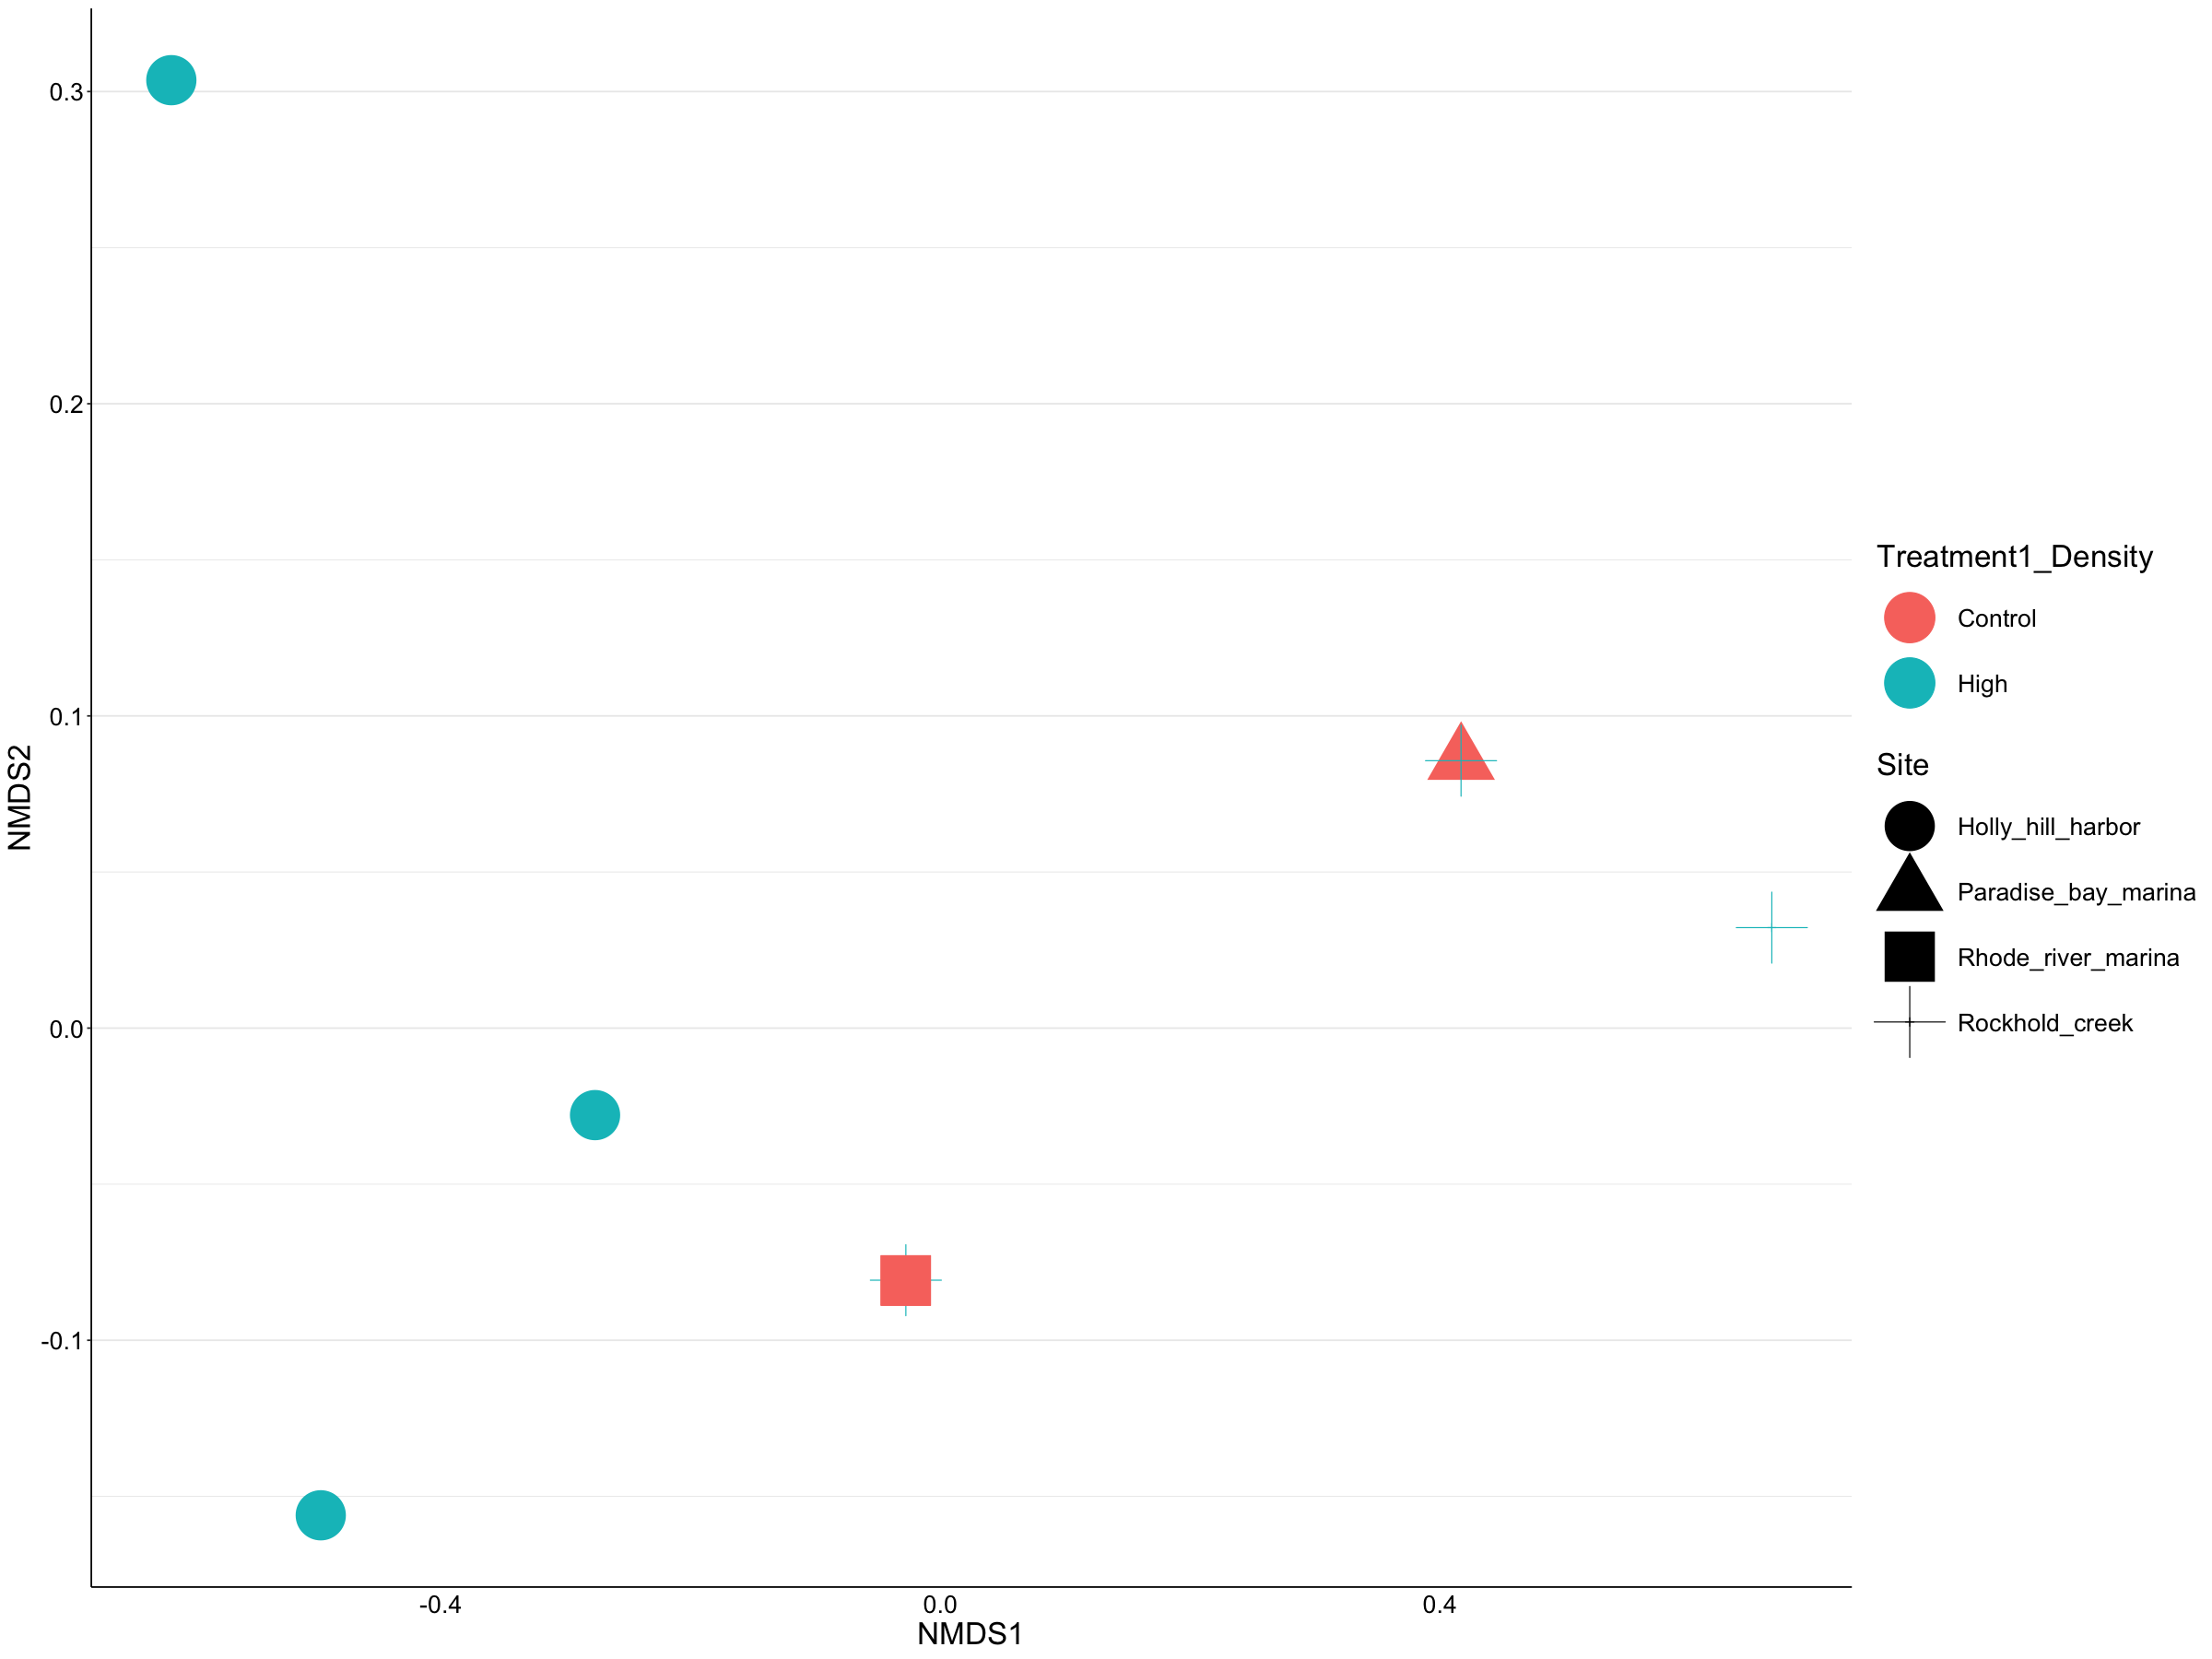

In [23]:
plot_ordination(River, River.ord, type="samples", color="Treatment1_Density", shape="Site")+ 
geom_point(size=15)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))

In [17]:
#ordinate jaccard dissimilarity
River.jord <- ordinate(River, "NMDS", "jaccard", trymax=500)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.002783084 
Run 1 stress 0.002884807 
... Procrustes: rmse 0.002600611  max resid 0.004427878 
... Similar to previous best
Run 2 stress 0.002724313 
... New best solution
... Procrustes: rmse 0.1007446  max resid 0.1769686 
Run 3 stress 0.08799388 
Run 4 stress 0.002631081 
... New best solution
... Procrustes: rmse 0.0006552931  max resid 0.001402972 
... Similar to previous best
Run 5 stress 0.0001613168 
... New best solution
... Procrustes: rmse 0.04844504  max resid 0.1196035 
Run 6 stress 9.844294e-05 
... New best solution
... Procrustes: rmse 0.04013919  max resid 0.06695448 
Run 7 stress 0.001411422 
Run 8 stress 9.869156e-05 
... Procrustes: rmse 0.03767469  max resid 0.09018954 
Run 9 stress 0.00010042 
... Procrustes: rmse 0.003812105  max resid 0.006525263 
... Similar to previous best
Run 10 stress 0.08795031 
Run 11 stress 0.00322578 
Run 12 stress 0.0004631719 
... Procrustes: rmse 0.0616646  max

Run 170 stress 0.1970014 
Run 171 stress 0.0003712745 
... Procrustes: rmse 0.02370655  max resid 0.04505898 
Run 172 stress 0.002581252 
Run 173 stress 0.08799388 
Run 174 stress 0.08795032 
Run 175 stress 0.2012383 
Run 176 stress 0.0003500887 
... Procrustes: rmse 0.05933842  max resid 0.125022 
Run 177 stress 9.645896e-05 
... Procrustes: rmse 0.03328459  max resid 0.05454931 
Run 178 stress 0.002891065 
Run 179 stress 0.0005731262 
... Procrustes: rmse 0.05991314  max resid 0.1223131 
Run 180 stress 0.0003280575 
... Procrustes: rmse 0.02945918  max resid 0.04401324 
Run 181 stress 0.0879503 
Run 182 stress 0.005079699 
Run 183 stress 0.08799388 
Run 184 stress 8.415522e-05 
... New best solution
... Procrustes: rmse 0.01526538  max resid 0.02745291 
Run 185 stress 0.002987055 
Run 186 stress 0.000834847 
Run 187 stress 0.0006530195 
Run 188 stress 0.001067753 
Run 189 stress 0.0001839617 
... Procrustes: rmse 0.01675634  max resid 0.03995371 
Run 190 stress 0.3332472 
Run 191 str

Run 324 stress 0.0005909997 
Run 325 stress 0.0009994825 
Run 326 stress 0.0003864122 
... Procrustes: rmse 0.07108376  max resid 0.1333377 
Run 327 stress 0.003052935 
Run 328 stress 0.002009851 
Run 329 stress 0.0001819433 
... Procrustes: rmse 0.02700633  max resid 0.04934047 
Run 330 stress 0.001215314 
Run 331 stress 0.2282411 
Run 332 stress 0.006640178 
Run 333 stress 0.0005089153 
... Procrustes: rmse 0.04141346  max resid 0.06795296 
Run 334 stress 0.005645901 
Run 335 stress 0.0004205023 
... Procrustes: rmse 0.04797285  max resid 0.08041152 
Run 336 stress 9.90625e-05 
... Procrustes: rmse 0.04834754  max resid 0.08120473 
Run 337 stress 0.0006478621 
Run 338 stress 0.08799388 
Run 339 stress 0.0006455292 
Run 340 stress 0.003080533 
Run 341 stress 9.657129e-05 
... Procrustes: rmse 0.08664752  max resid 0.1778893 
Run 342 stress 9.088385e-05 
... Procrustes: rmse 0.09312311  max resid 0.1875778 
Run 343 stress 0.003149293 
Run 344 stress 0.0002329031 
... Procrustes: rmse 0

Run 493 stress 0.1736212 
Run 494 stress 0.2010519 
Run 495 stress 9.796481e-05 
... Procrustes: rmse 0.01247572  max resid 0.02200017 
Run 496 stress 0.0004444576 
... Procrustes: rmse 0.04208315  max resid 0.06369 
Run 497 stress 0.202527 
Run 498 stress 0.002758357 
Run 499 stress 0.0030309 
Run 500 stress 0.0005232214 
... Procrustes: rmse 0.03419032  max resid 0.05675905 
*** No convergence -- monoMDS stopping criteria:
   341: no. of iterations >= maxit
    59: stress < smin
    54: stress ratio > sratmax
    46: scale factor of the gradient < sfgrmin


Warning message in metaMDS(veganifyOTU(physeq), distance, ...):
“stress is (nearly) zero: you may have insufficient data”


In [18]:
River

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1220 taxa and 10 samples ]
sample_data() Sample Data:       [ 10 samples by 17 sample variables ]
tax_table()   Taxonomy Table:    [ 1220 taxa by 6 taxonomic ranks ]

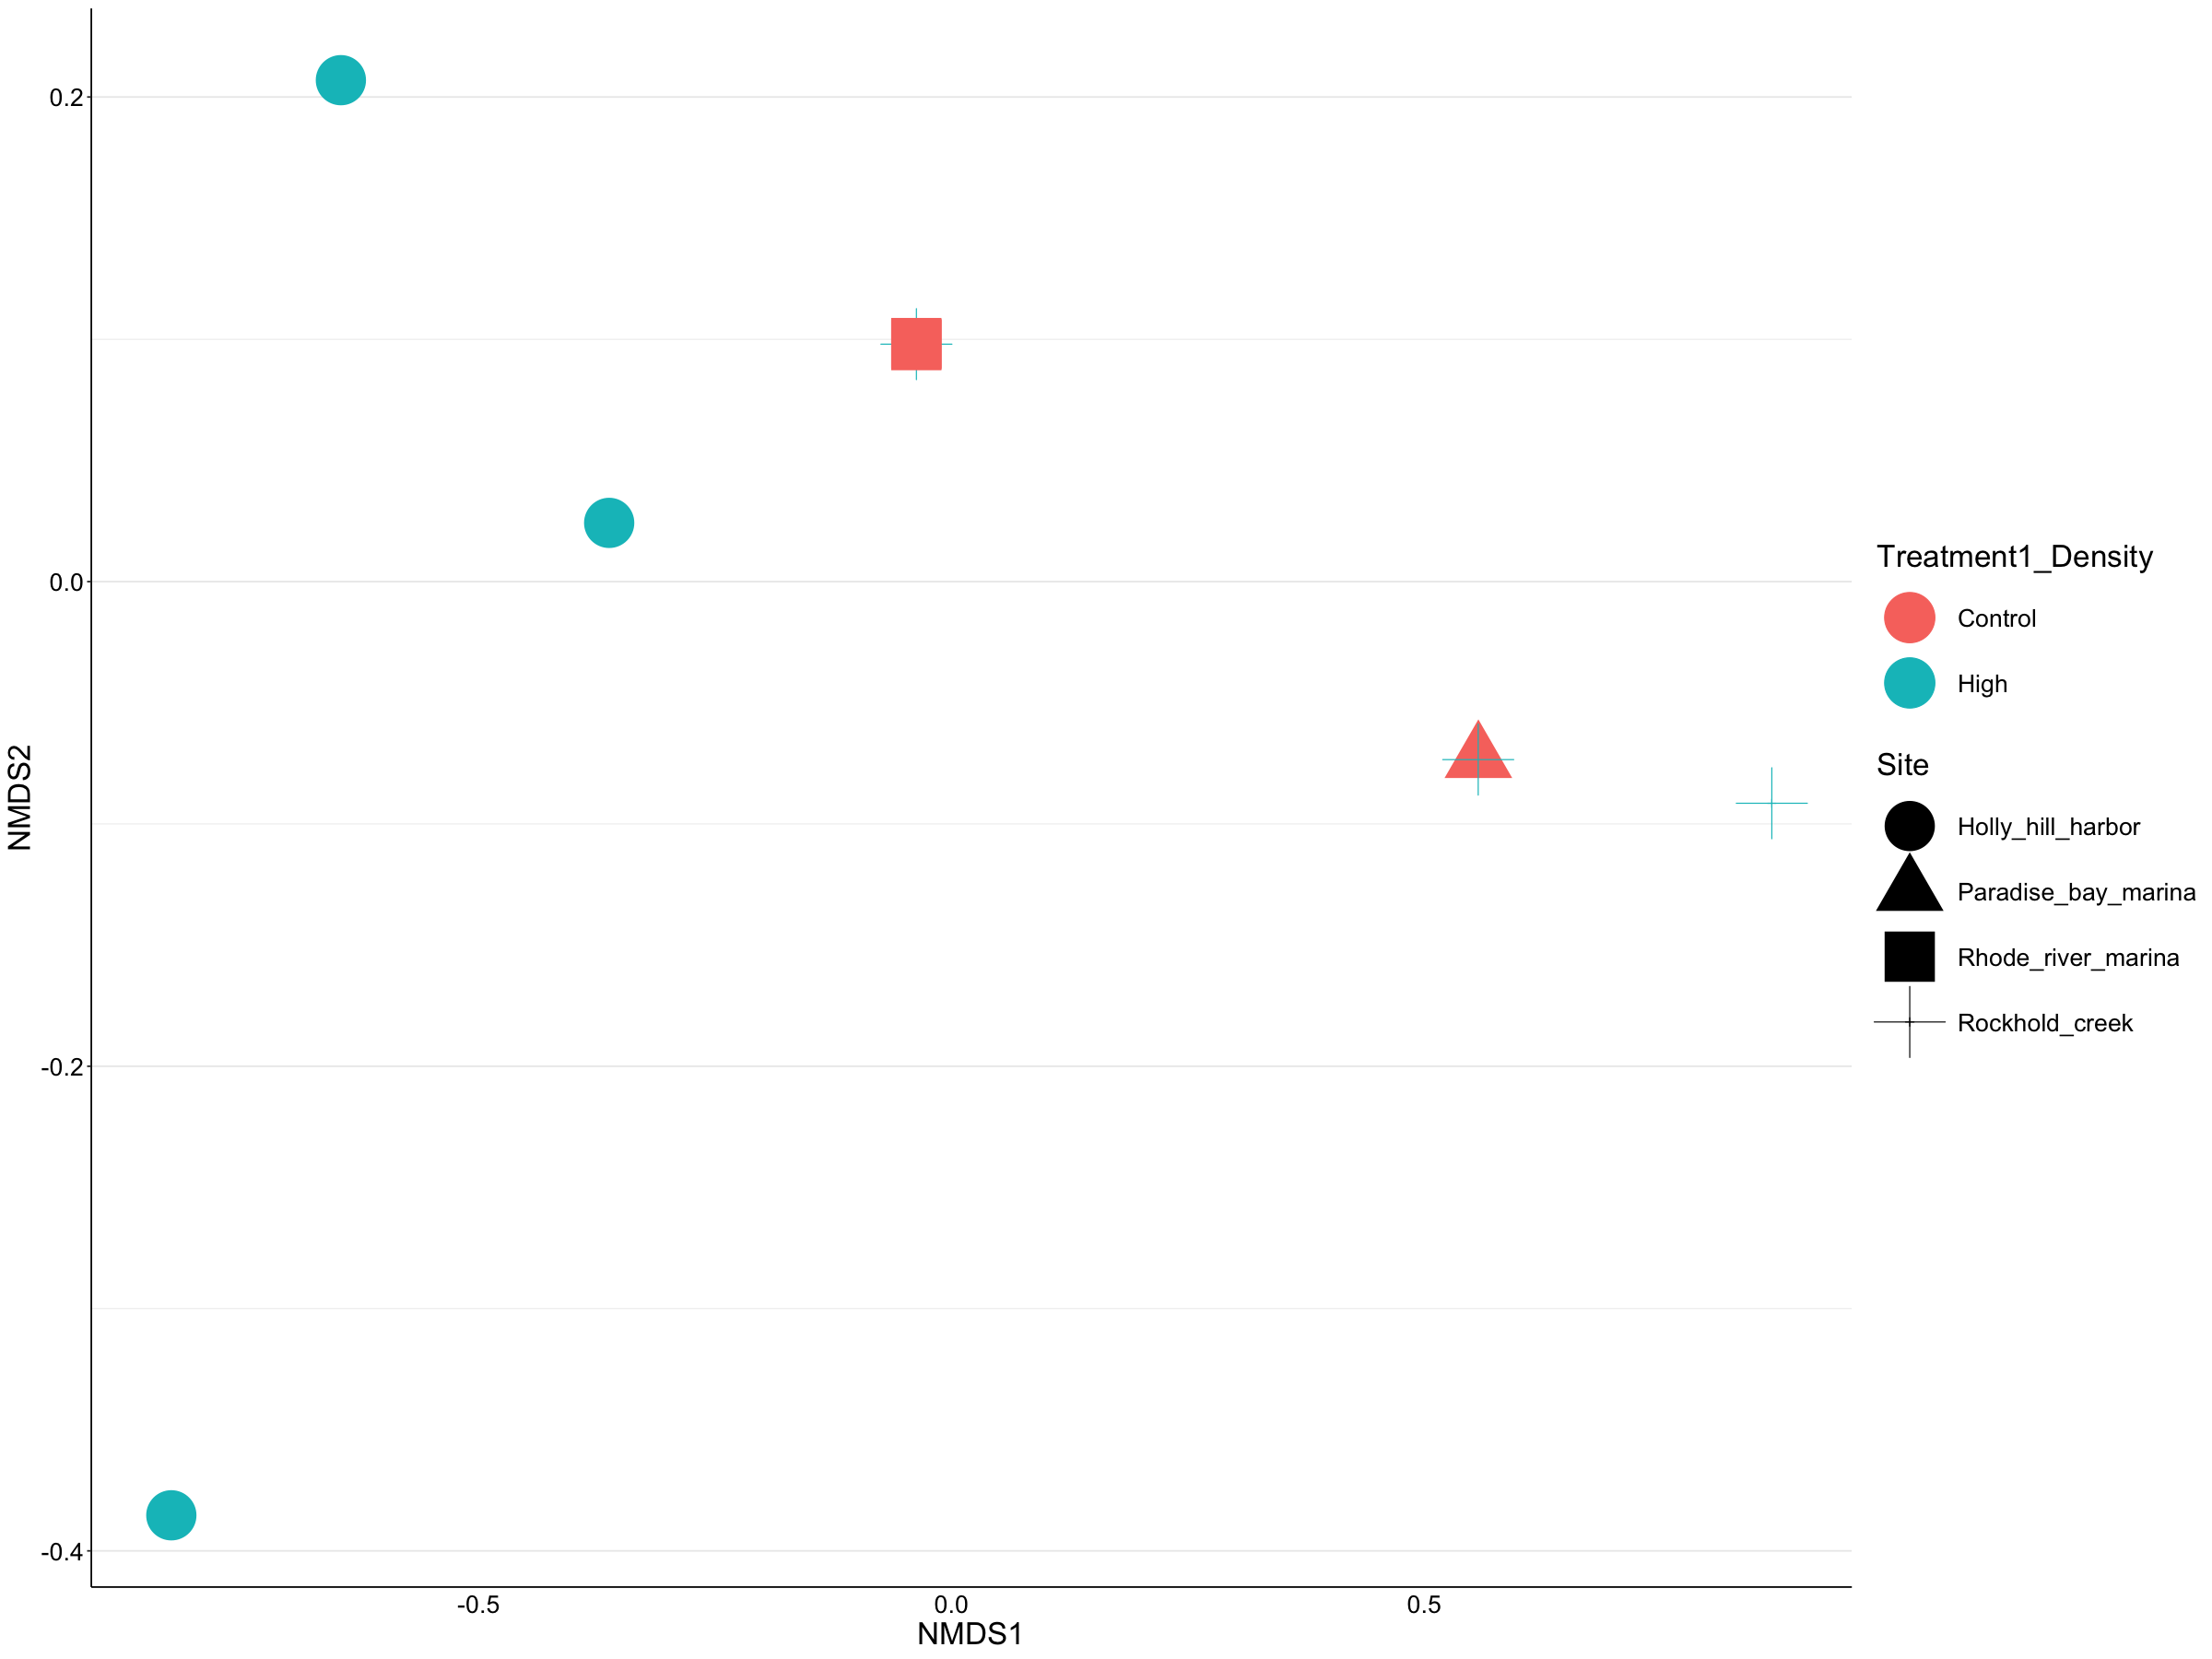

In [25]:
plot_ordination(River, River.jord, type="samples", color="Treatment1_Density", shape="Site")+ 
geom_point(size=15)+

theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))

Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”


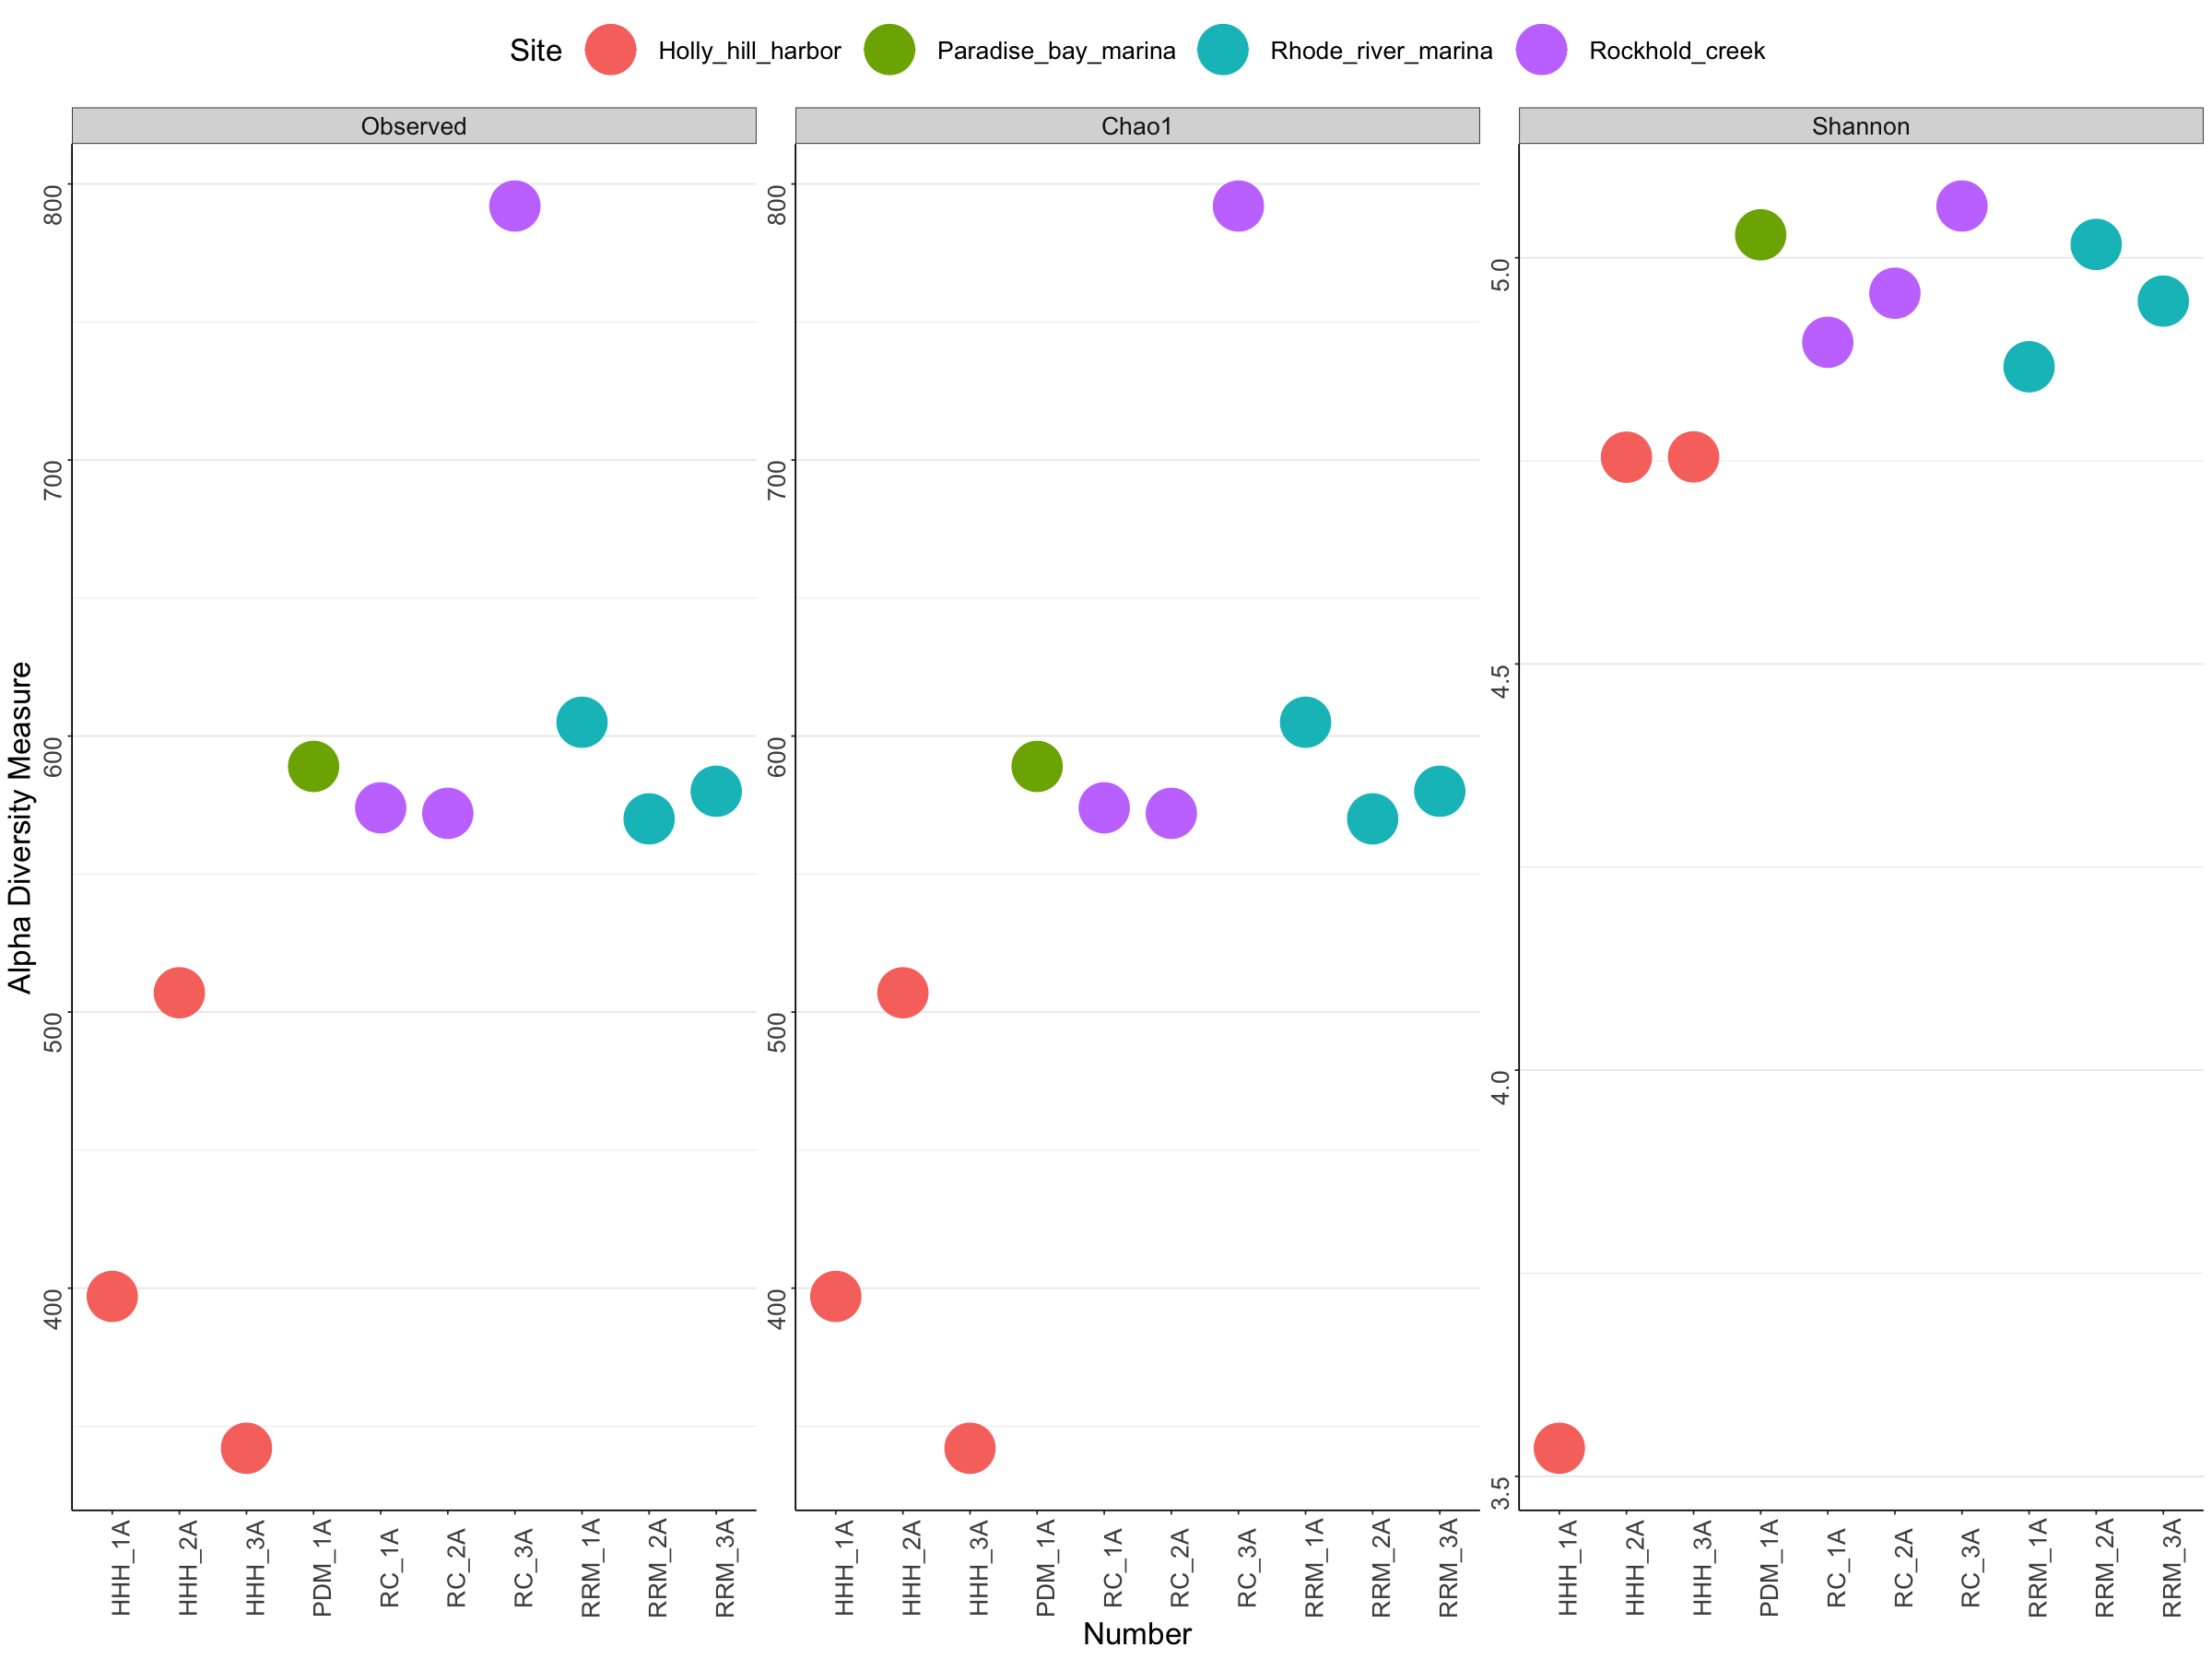

In [33]:
plot_richness(River, color="Site", x="Number", measures=c("observed", "Chao1", "Shannon"))+
theme_bw()+
geom_point(size=15)+

theme(legend.position="top", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.line=element_line(color="black"), axis.text=element_text(angle=90),
          text = element_text(size=20))

## Look at top 100 taxa

In [26]:
River_100 = prune_taxa(names(sort(taxa_sums(River),TRUE)[1:100]), River)

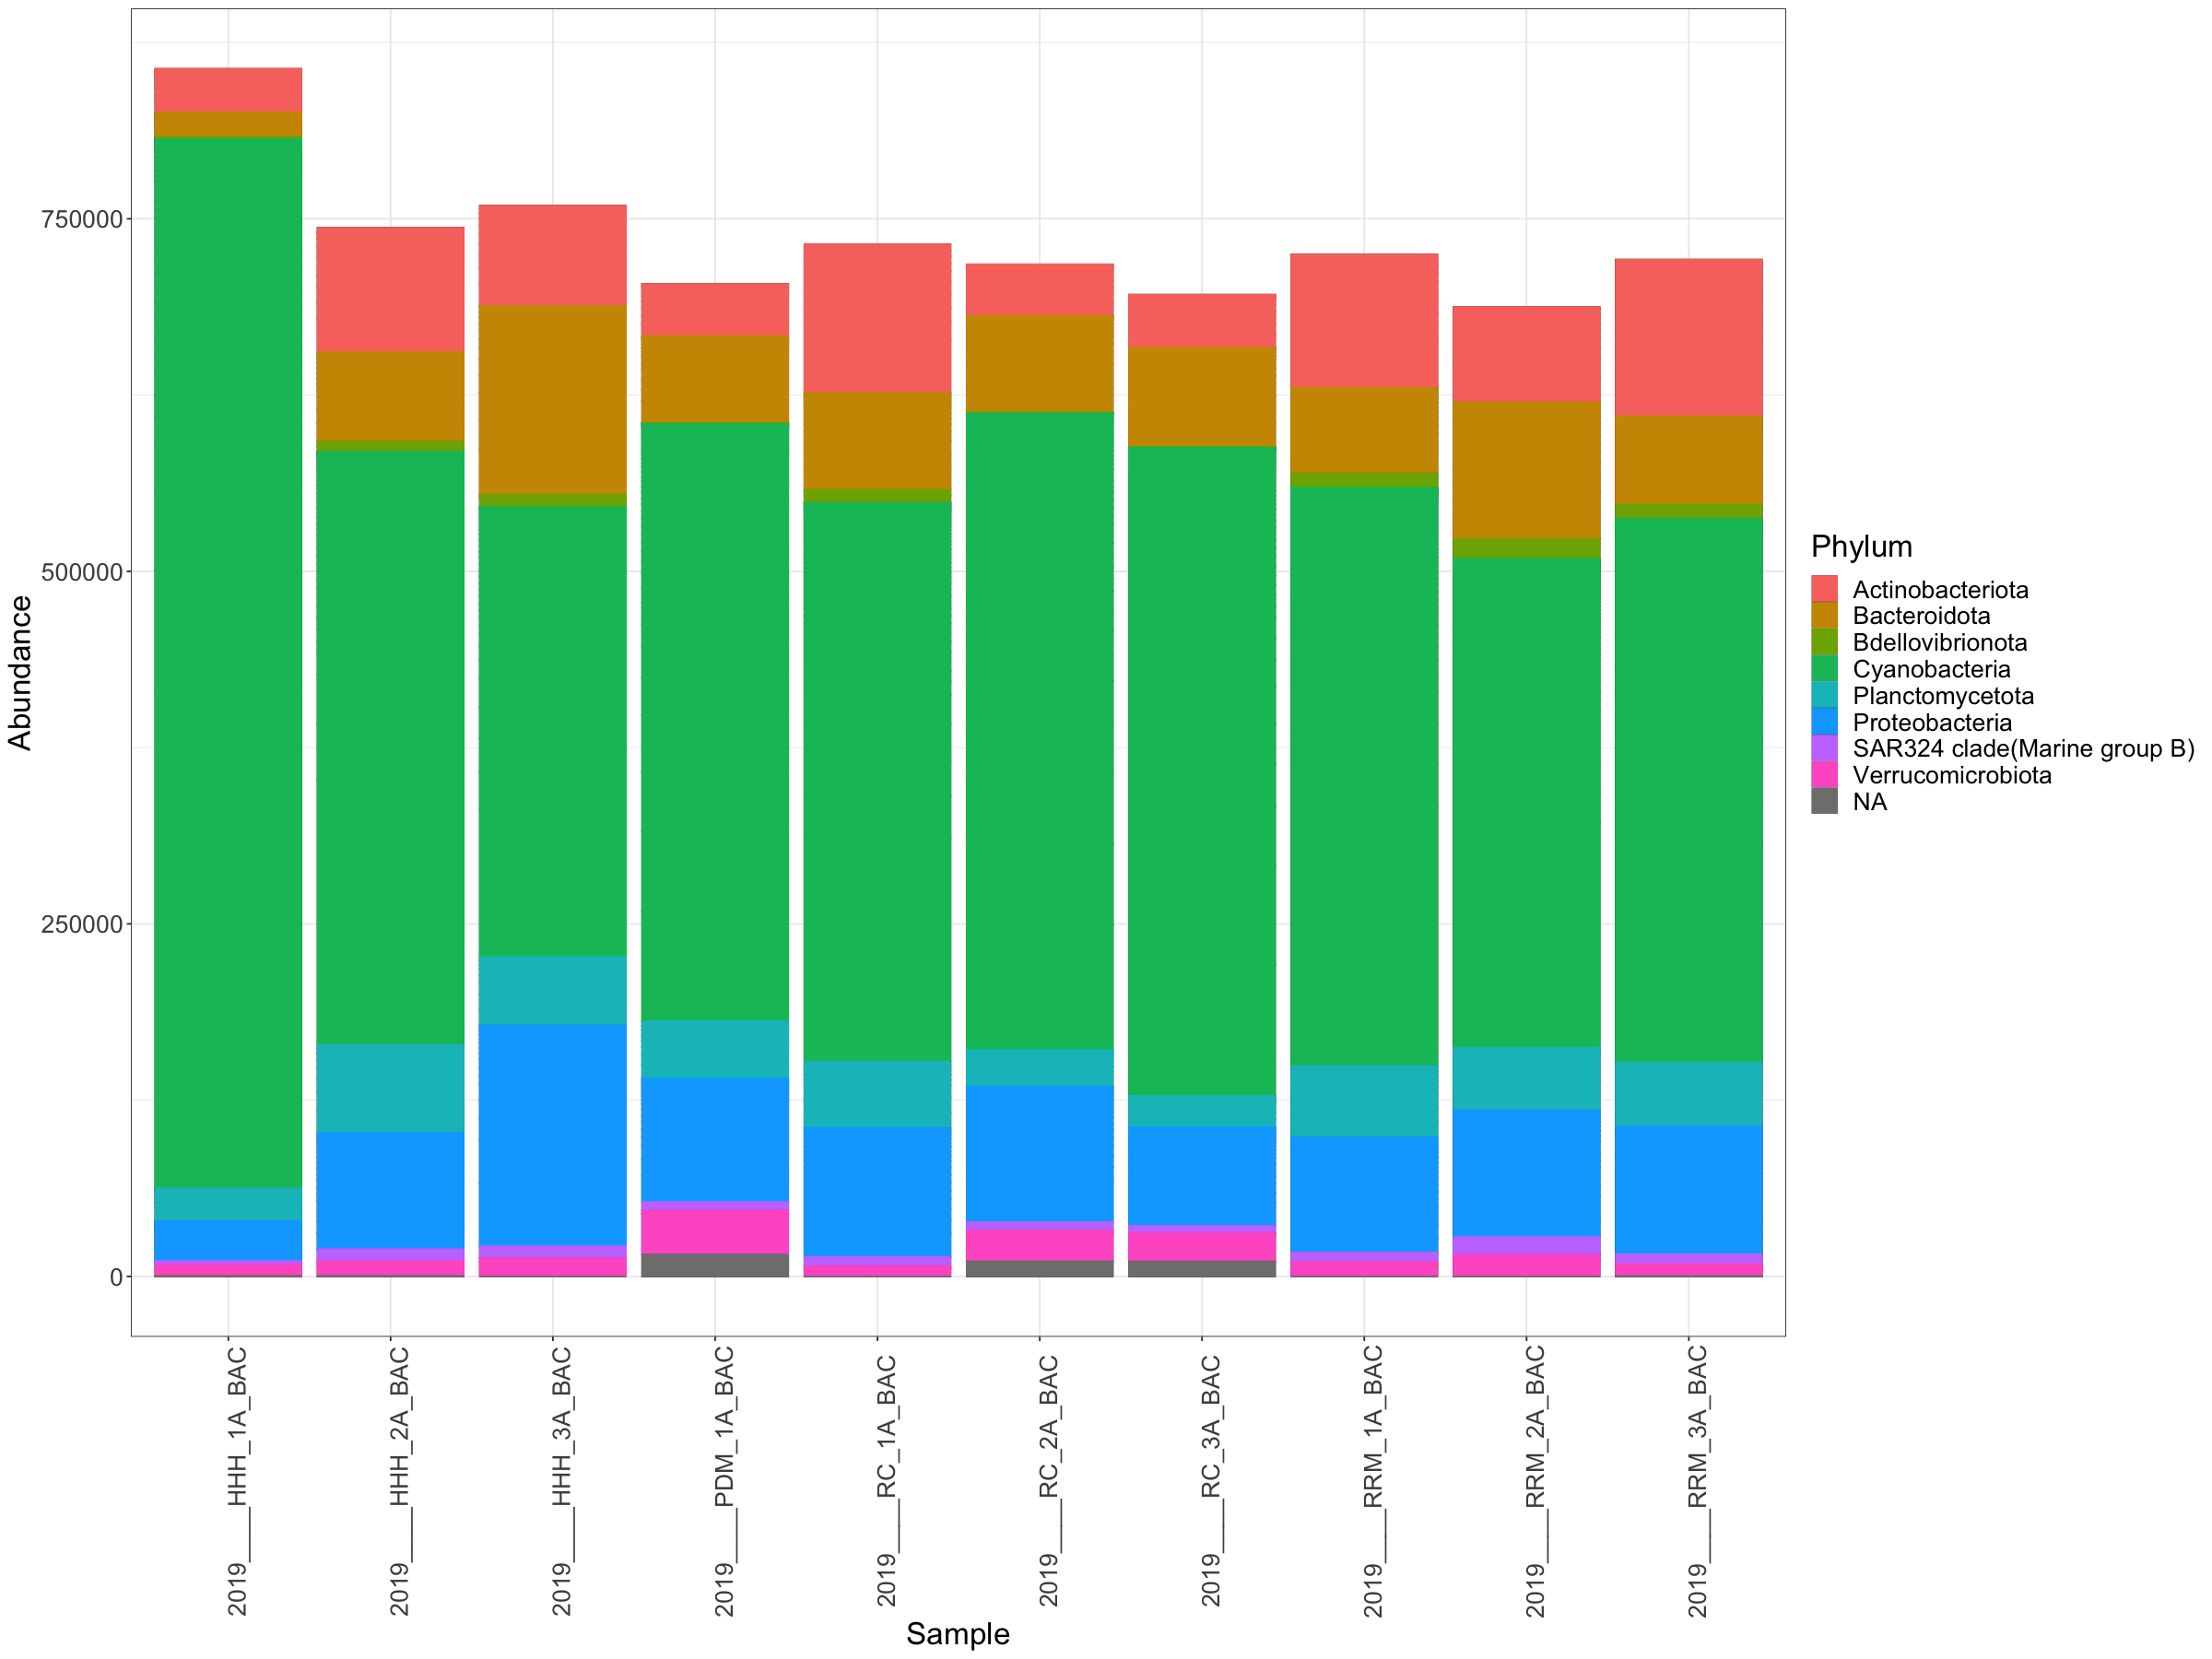

In [36]:
plot_bar(River_100,  fill="Phylum") +
geom_bar(aes(color=Phylum, fill=Phylum), stat="identity", position="stack")+
theme_bw()+
theme(axis.text.x = element_text(angle = 90), text = element_text(size=20))

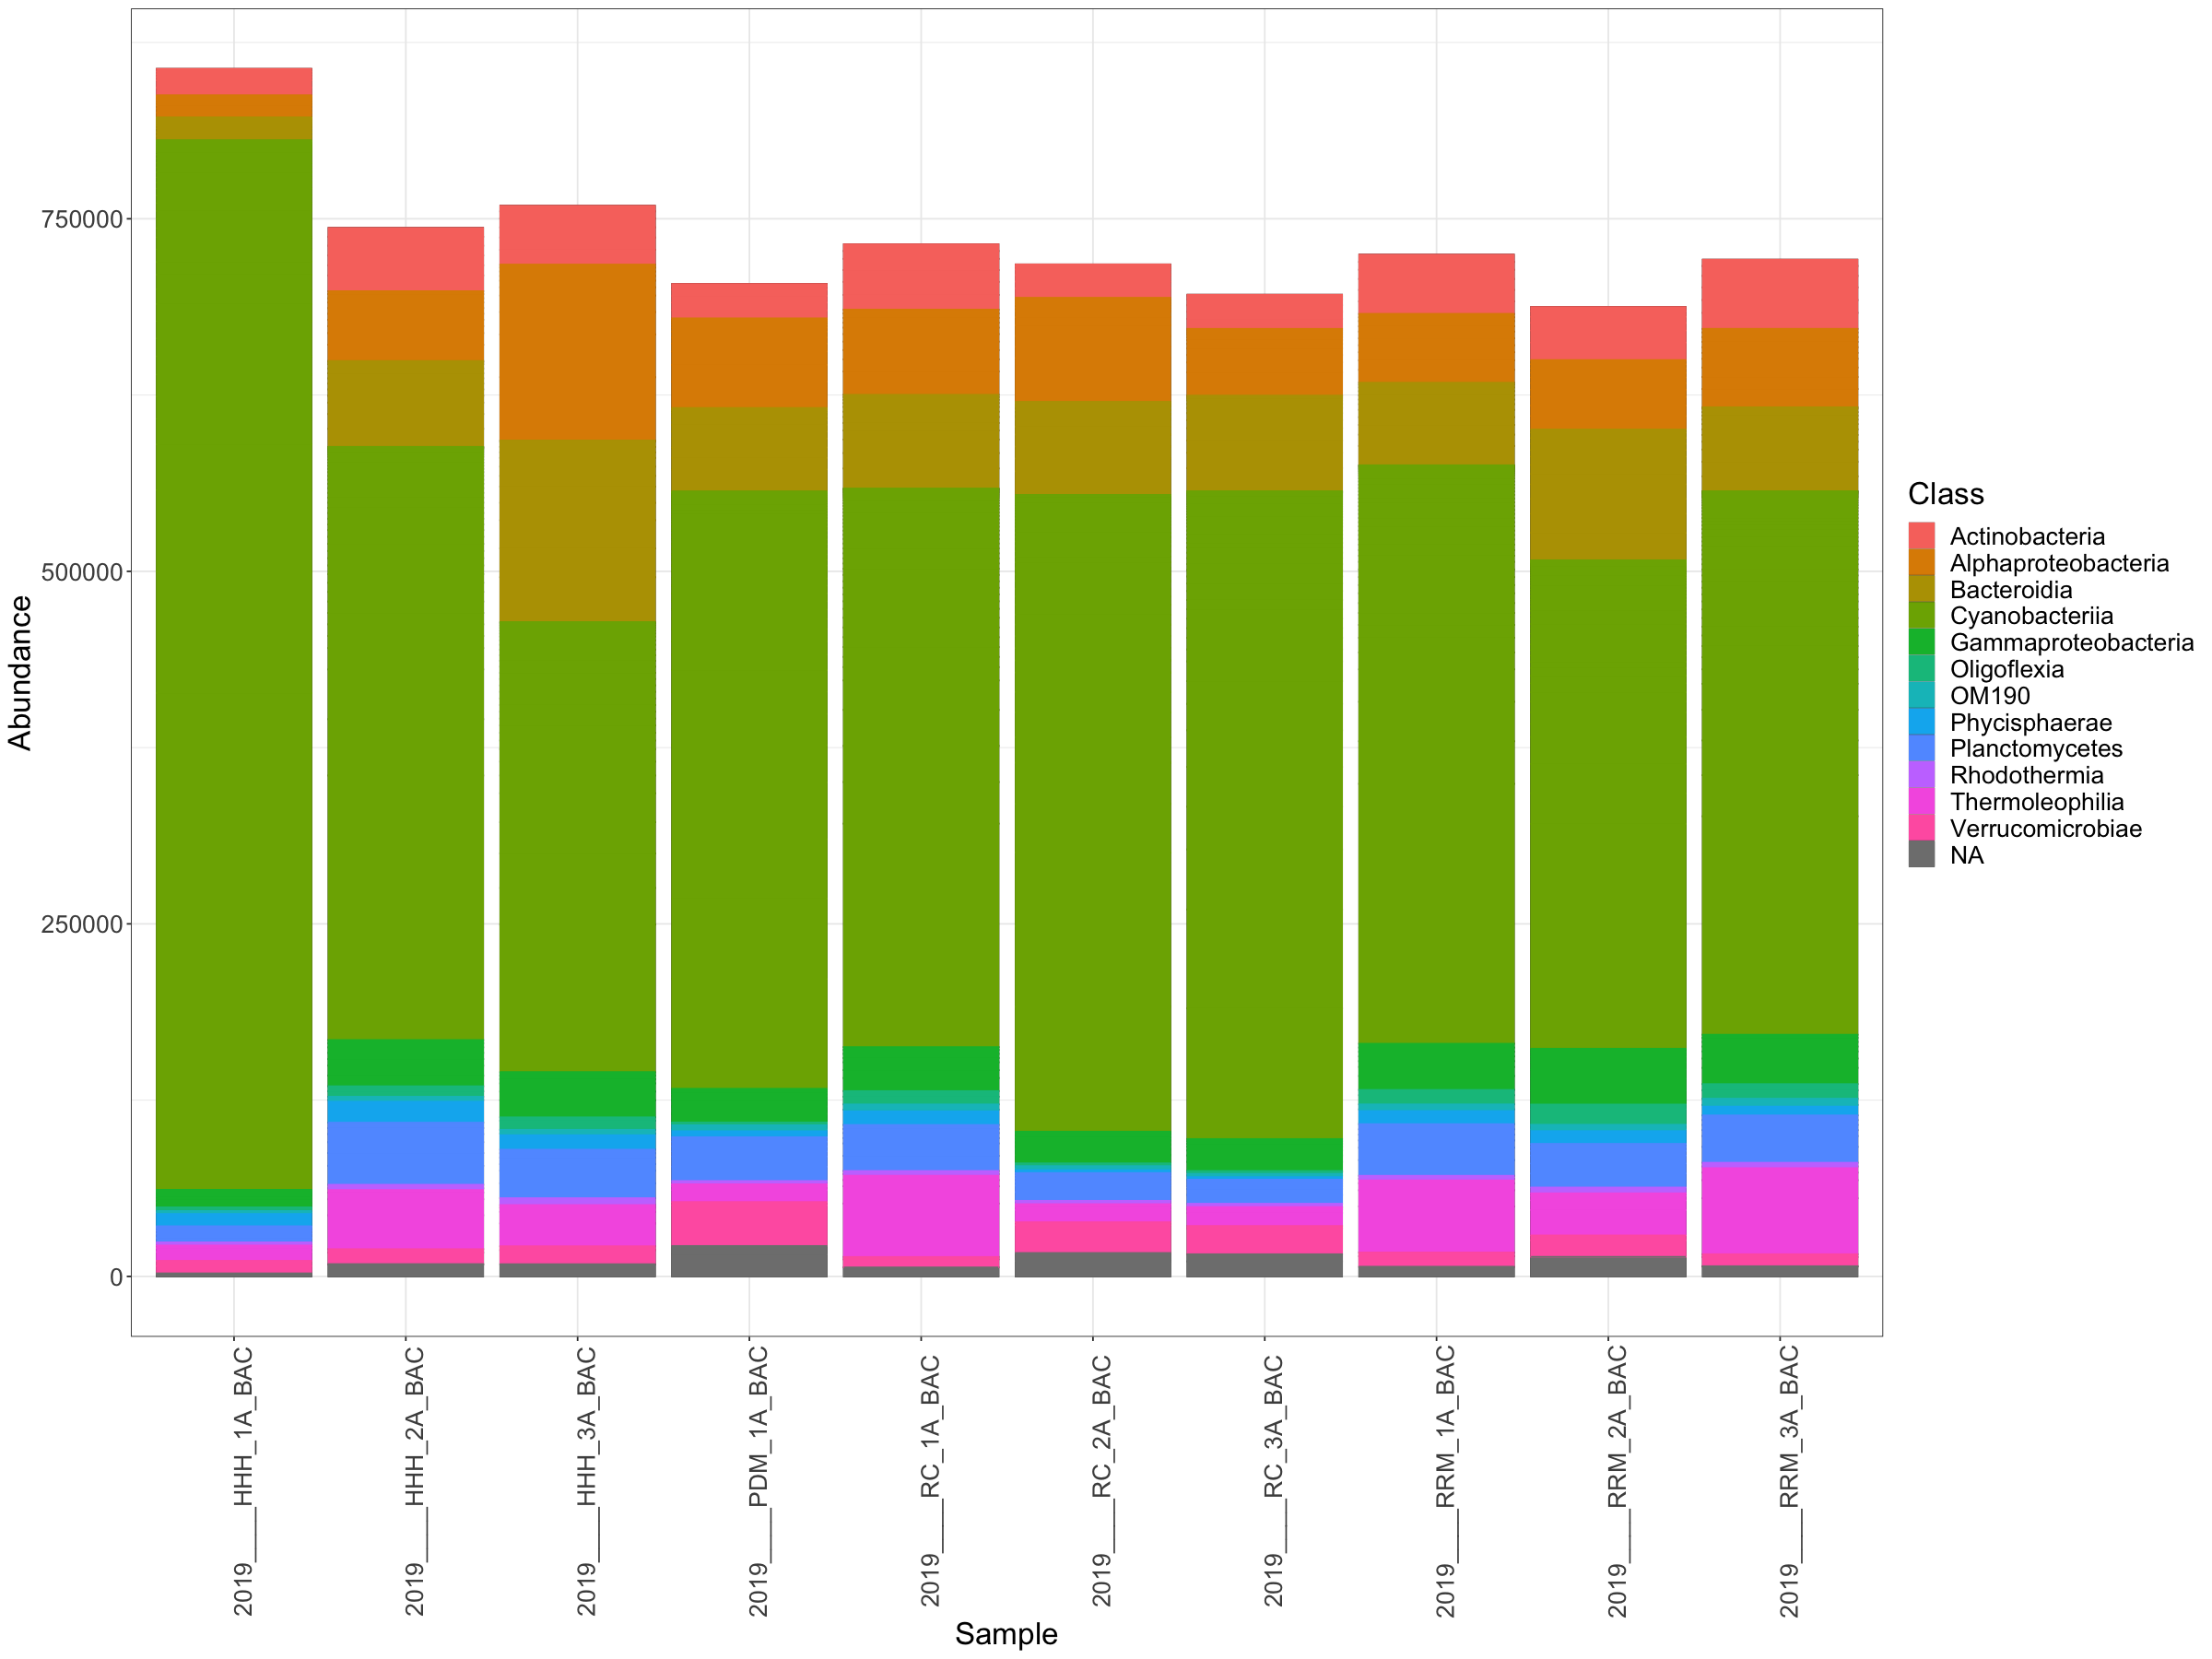

In [37]:
plot_bar(River_100,  fill="Class") +
geom_bar(aes(color=Class, fill=Class), stat="identity", position="stack")+
theme_bw()+
theme(axis.text.x = element_text(angle = 90), text = element_text(size=20))

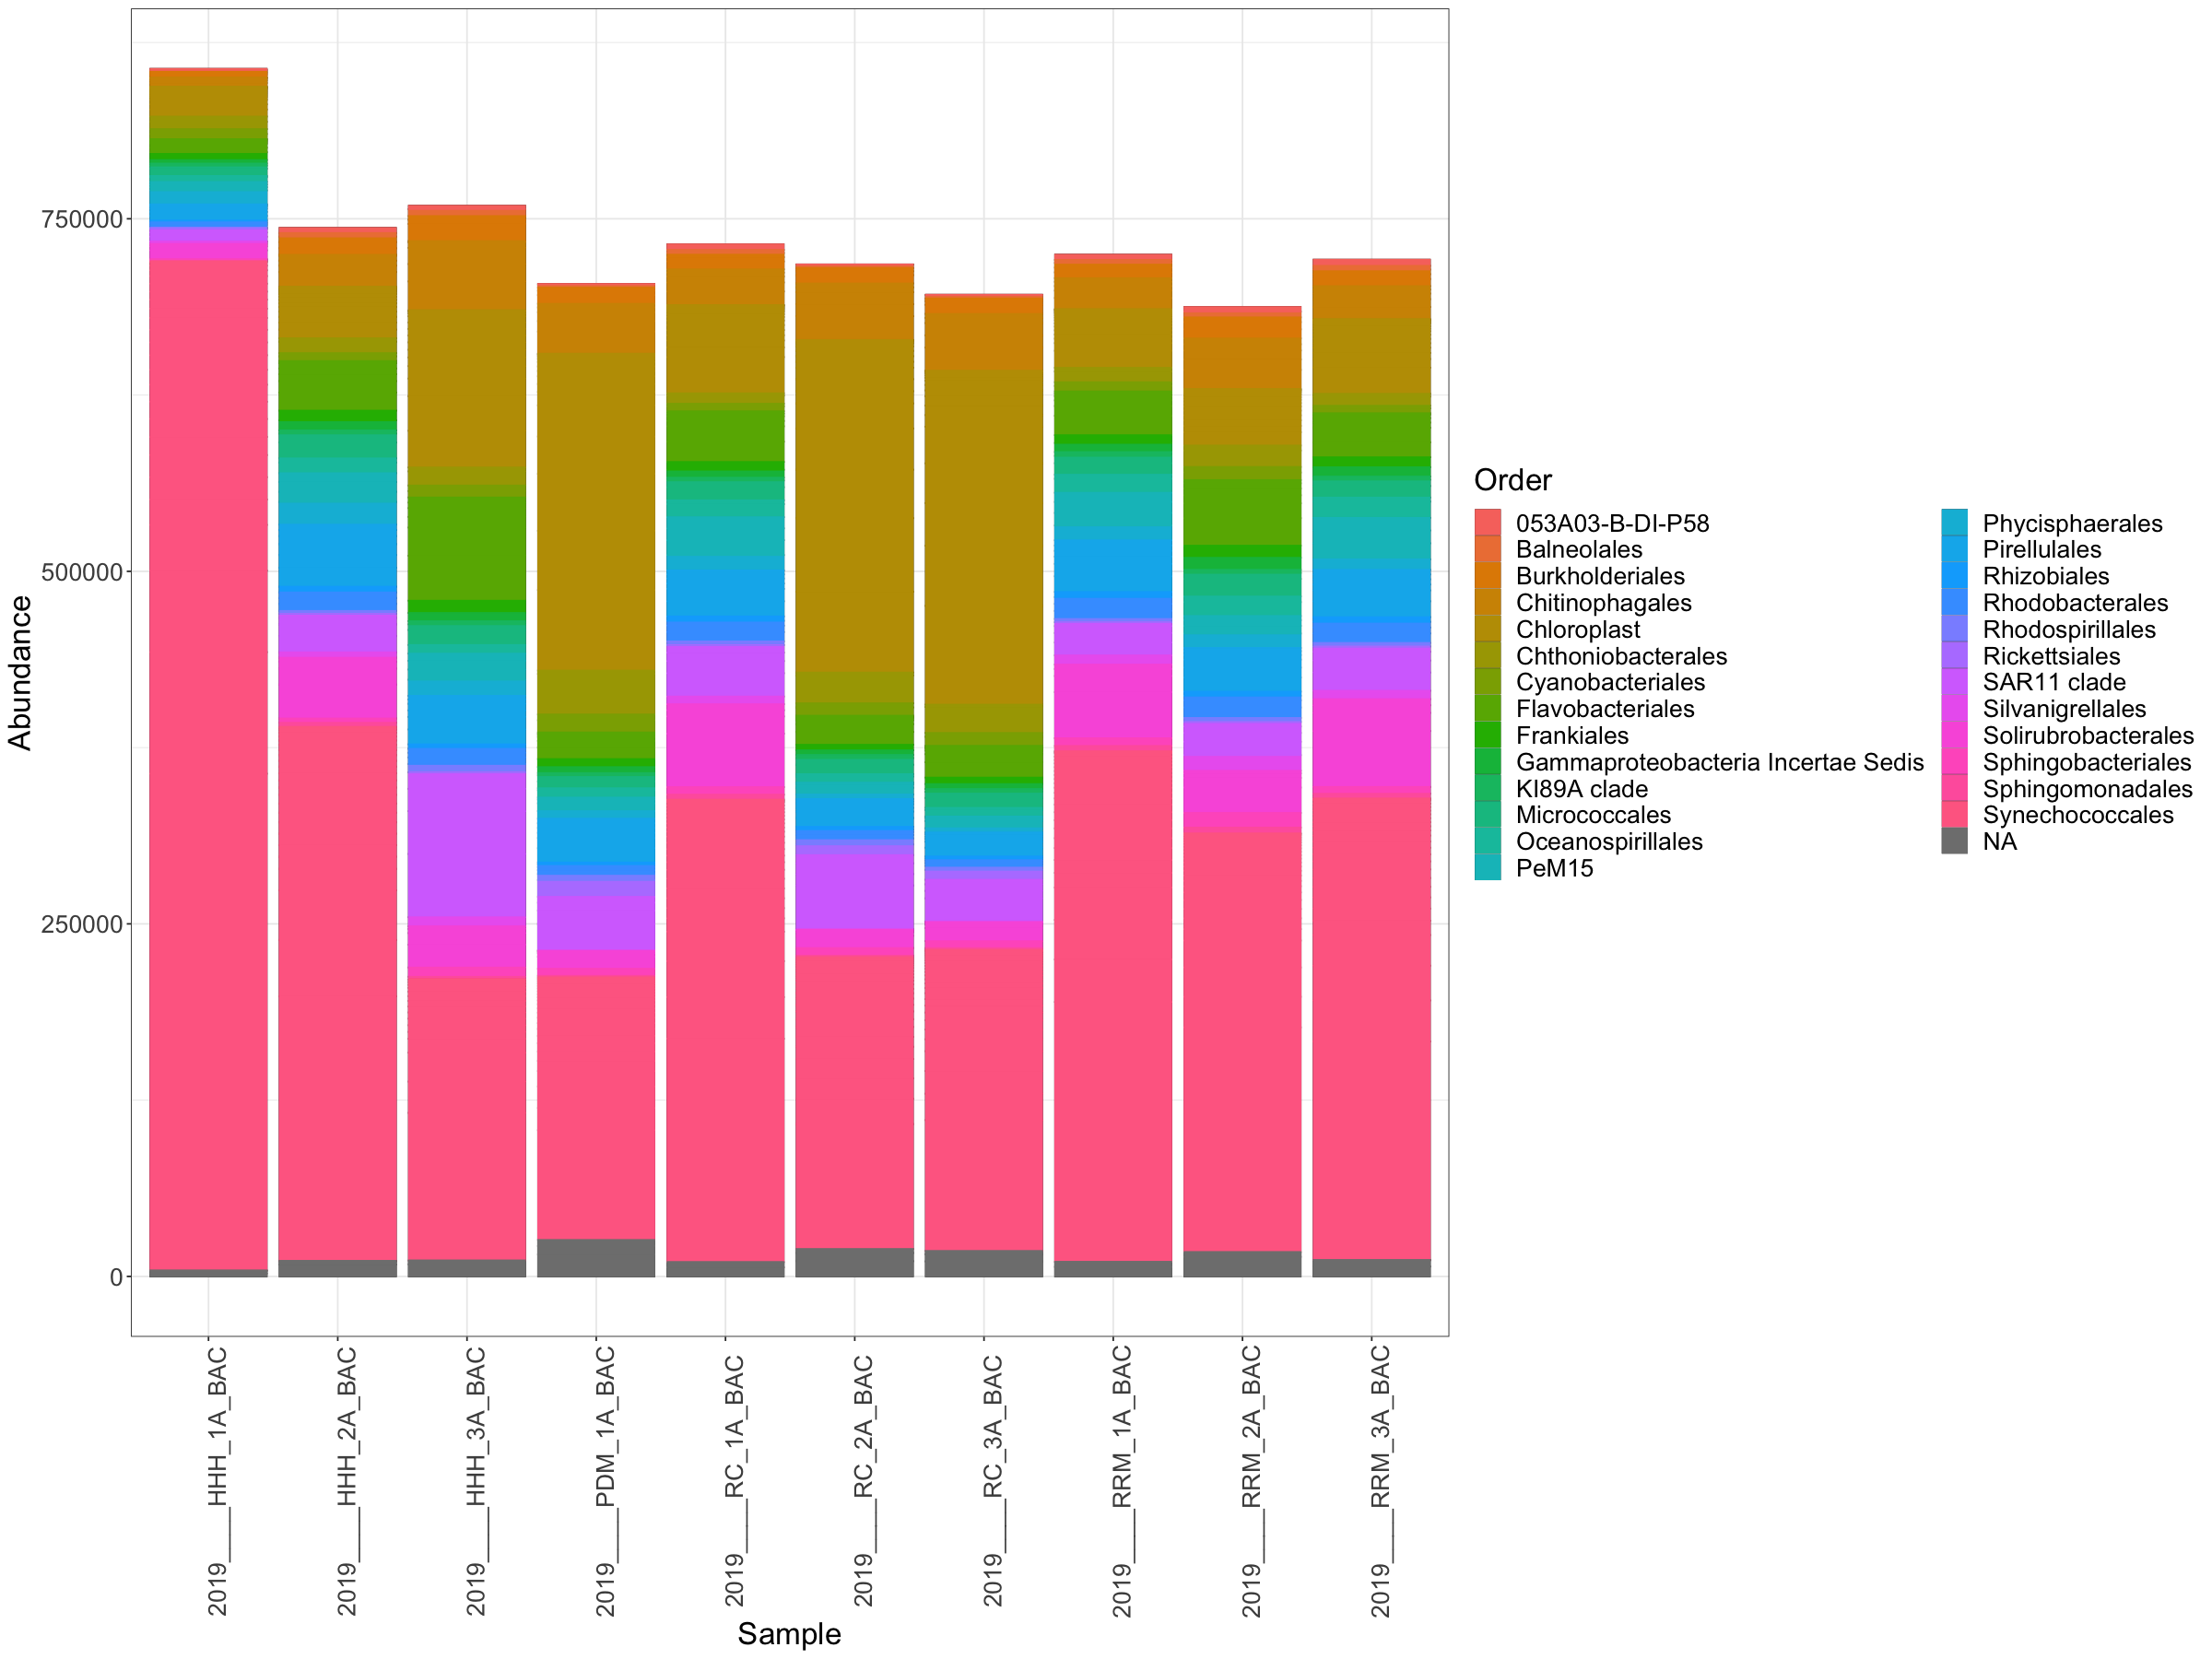

In [40]:
plot_bar(River_100,  fill="Order") +
geom_bar(aes(color=Order, fill=Order), stat="identity", position="stack")+
theme_bw()+
theme(axis.text.x = element_text(angle = 90), text = element_text(size=20))

## Pull out cyanos

Warning message:
“Transformation introduced infinite values in discrete y-axis”


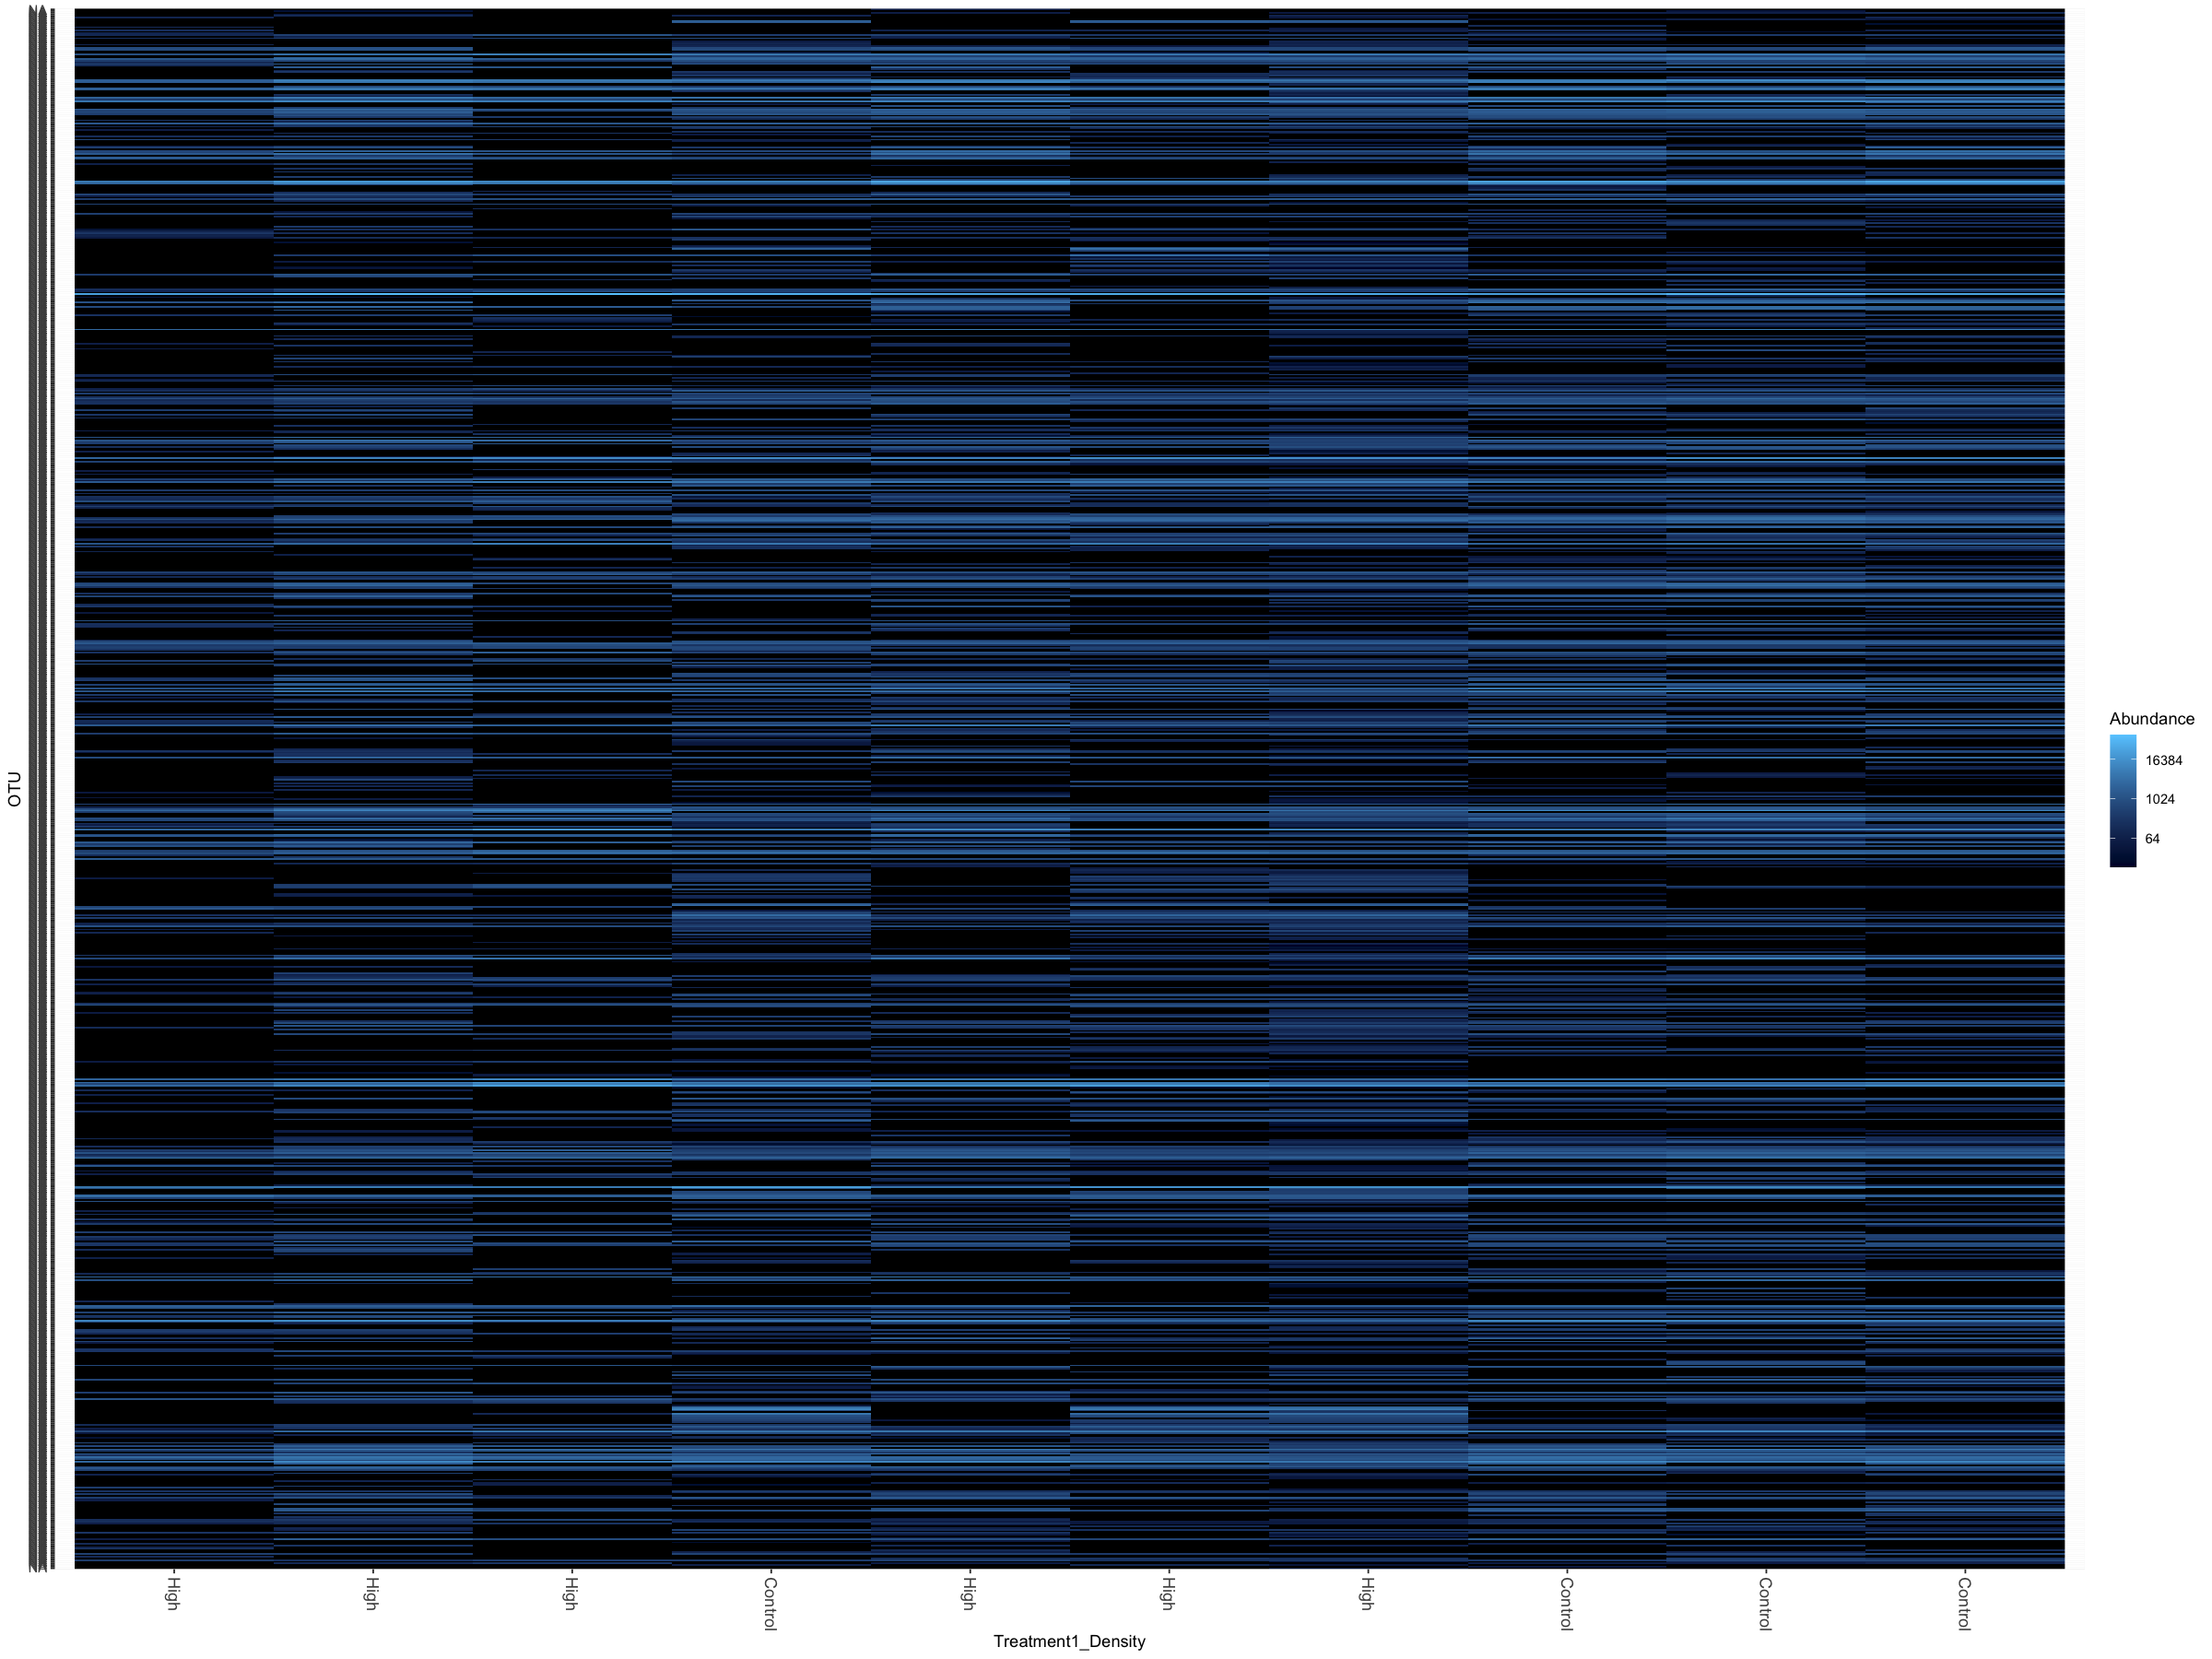

In [15]:
River_nocyano = subset_taxa(River, Phylum!="Cyanobacteria")
plot_heatmap(River_nocyano, method=NULL, distance=NULL, "Treatment1_Density", "Order")

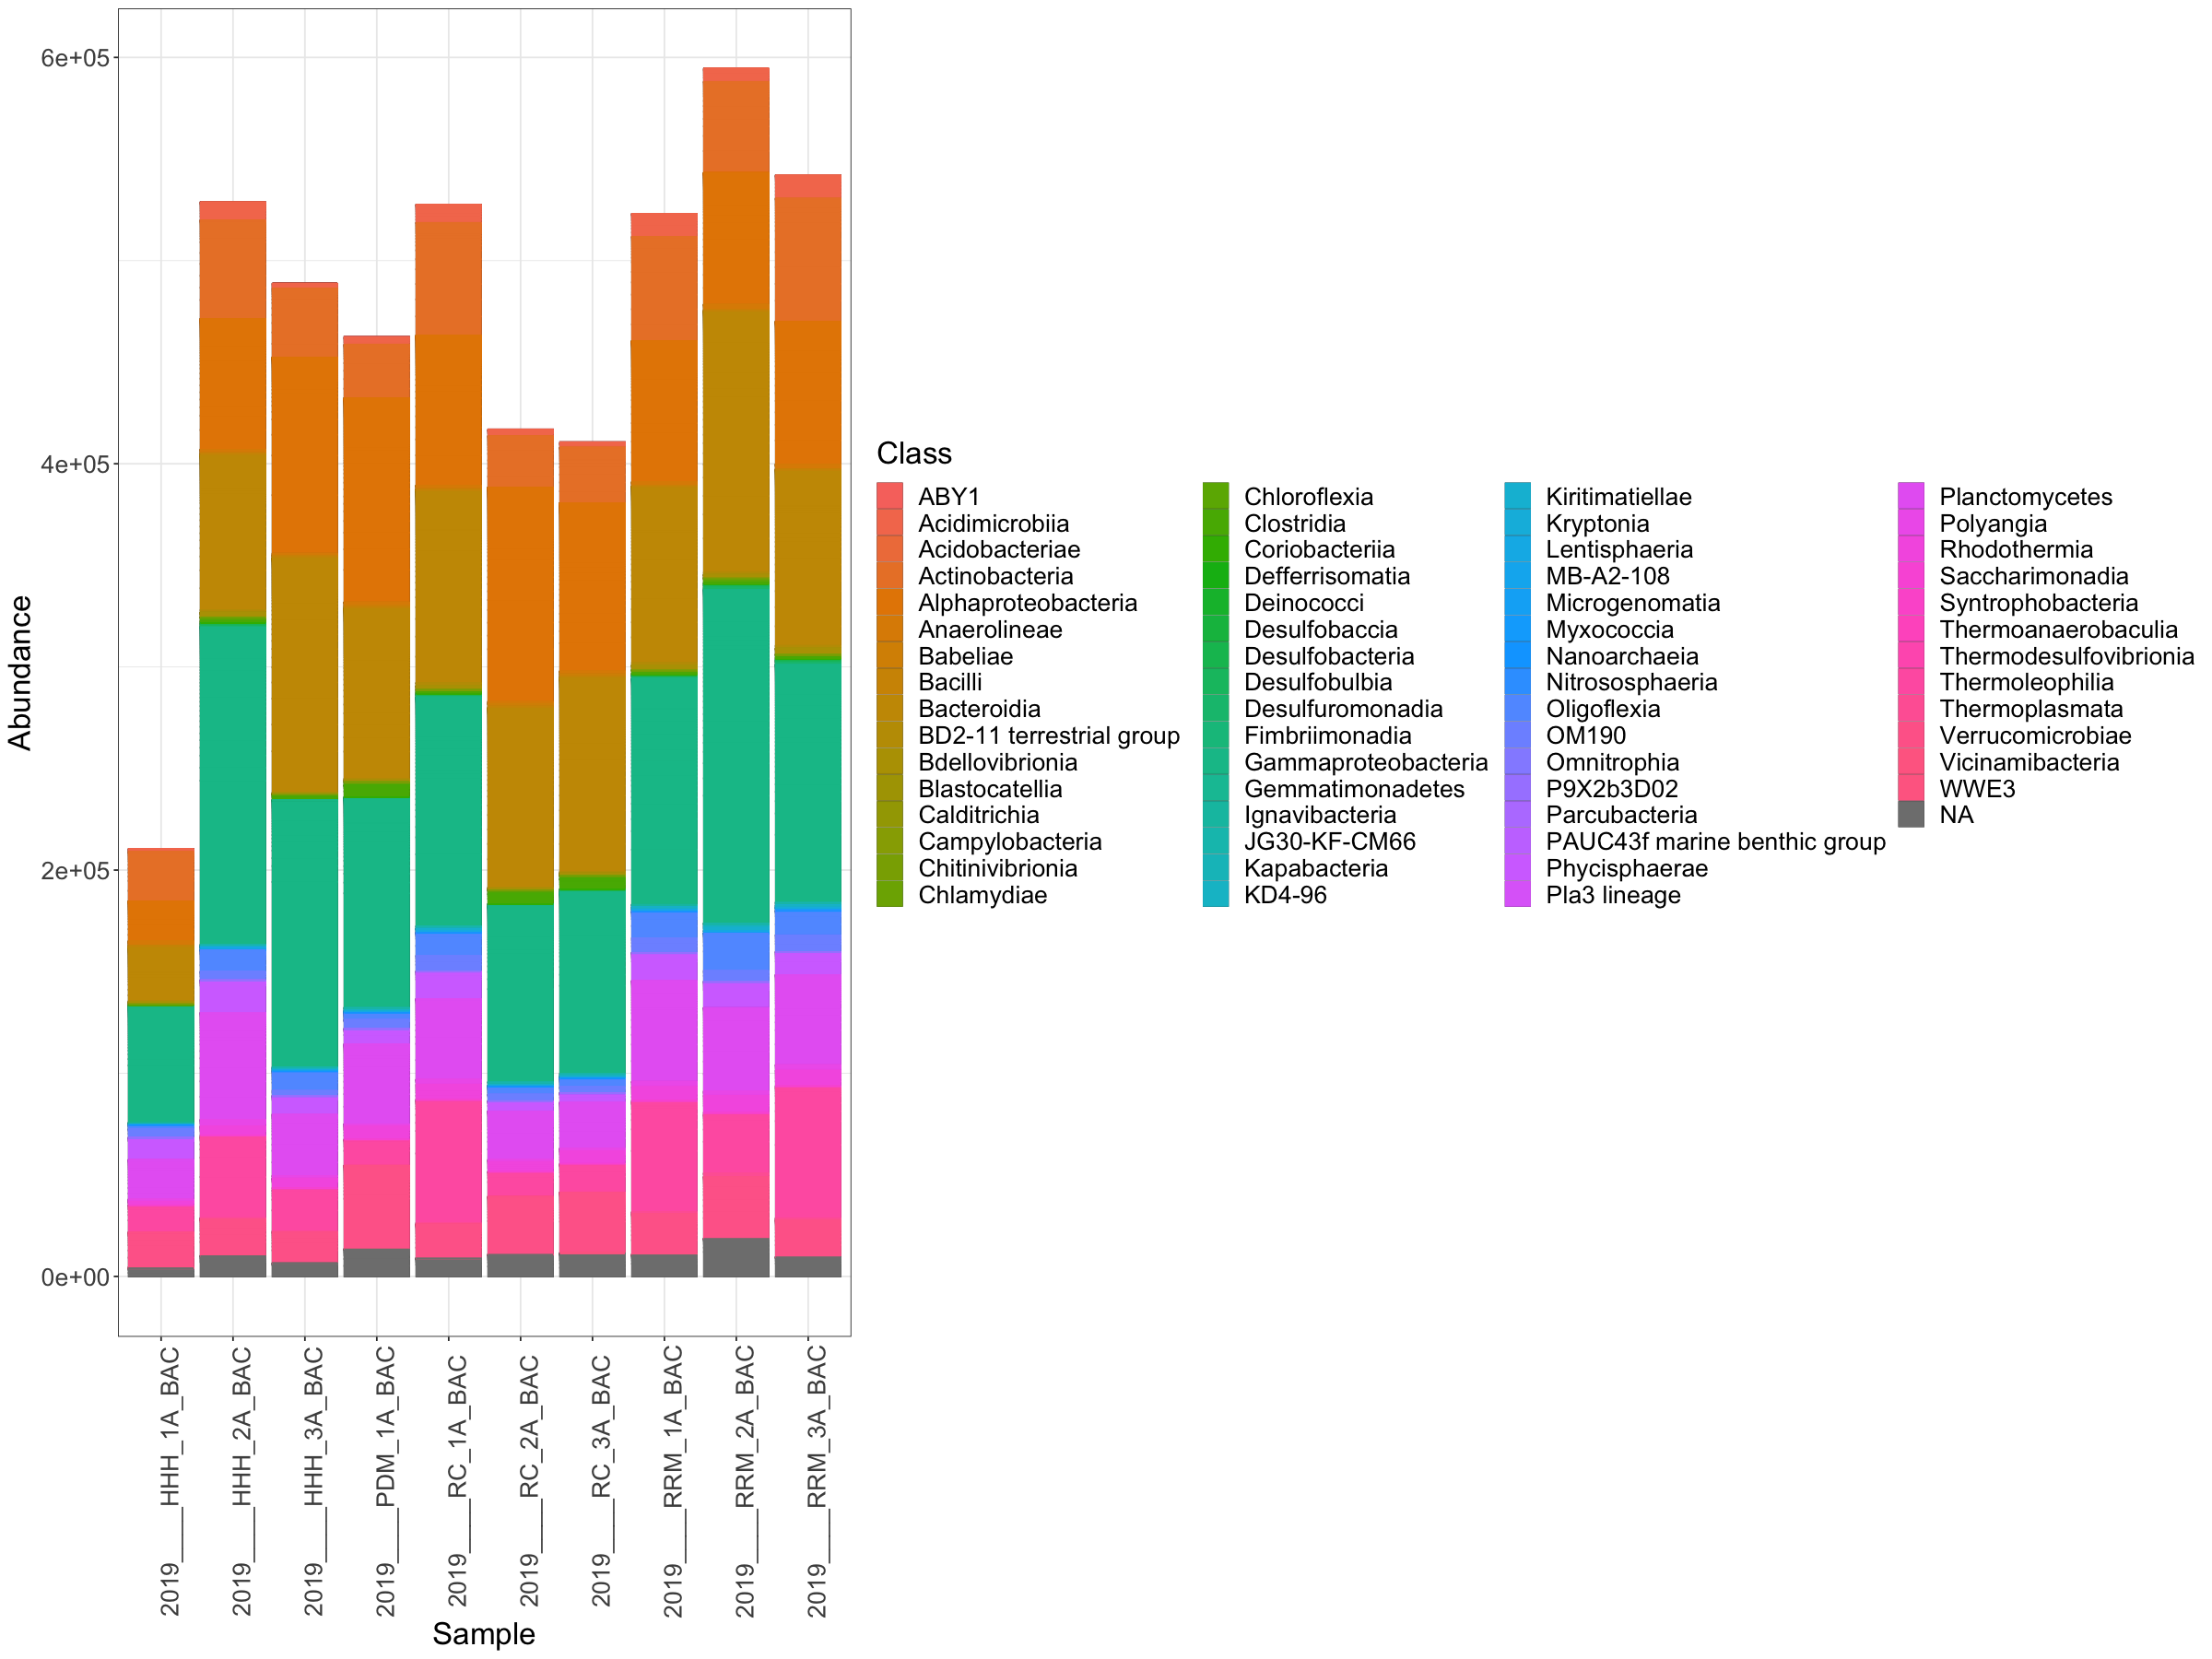

In [16]:
plot_bar(River_nocyano,  fill="Class") +
geom_bar(aes(color=Class, fill=Class), stat="identity", position="stack")+
theme_bw()+
theme(axis.text.x = element_text(angle = 90), text = element_text(size=20))

In [23]:
River_bacilli = subset_taxa(River_nocyano, Class="Bacilli")


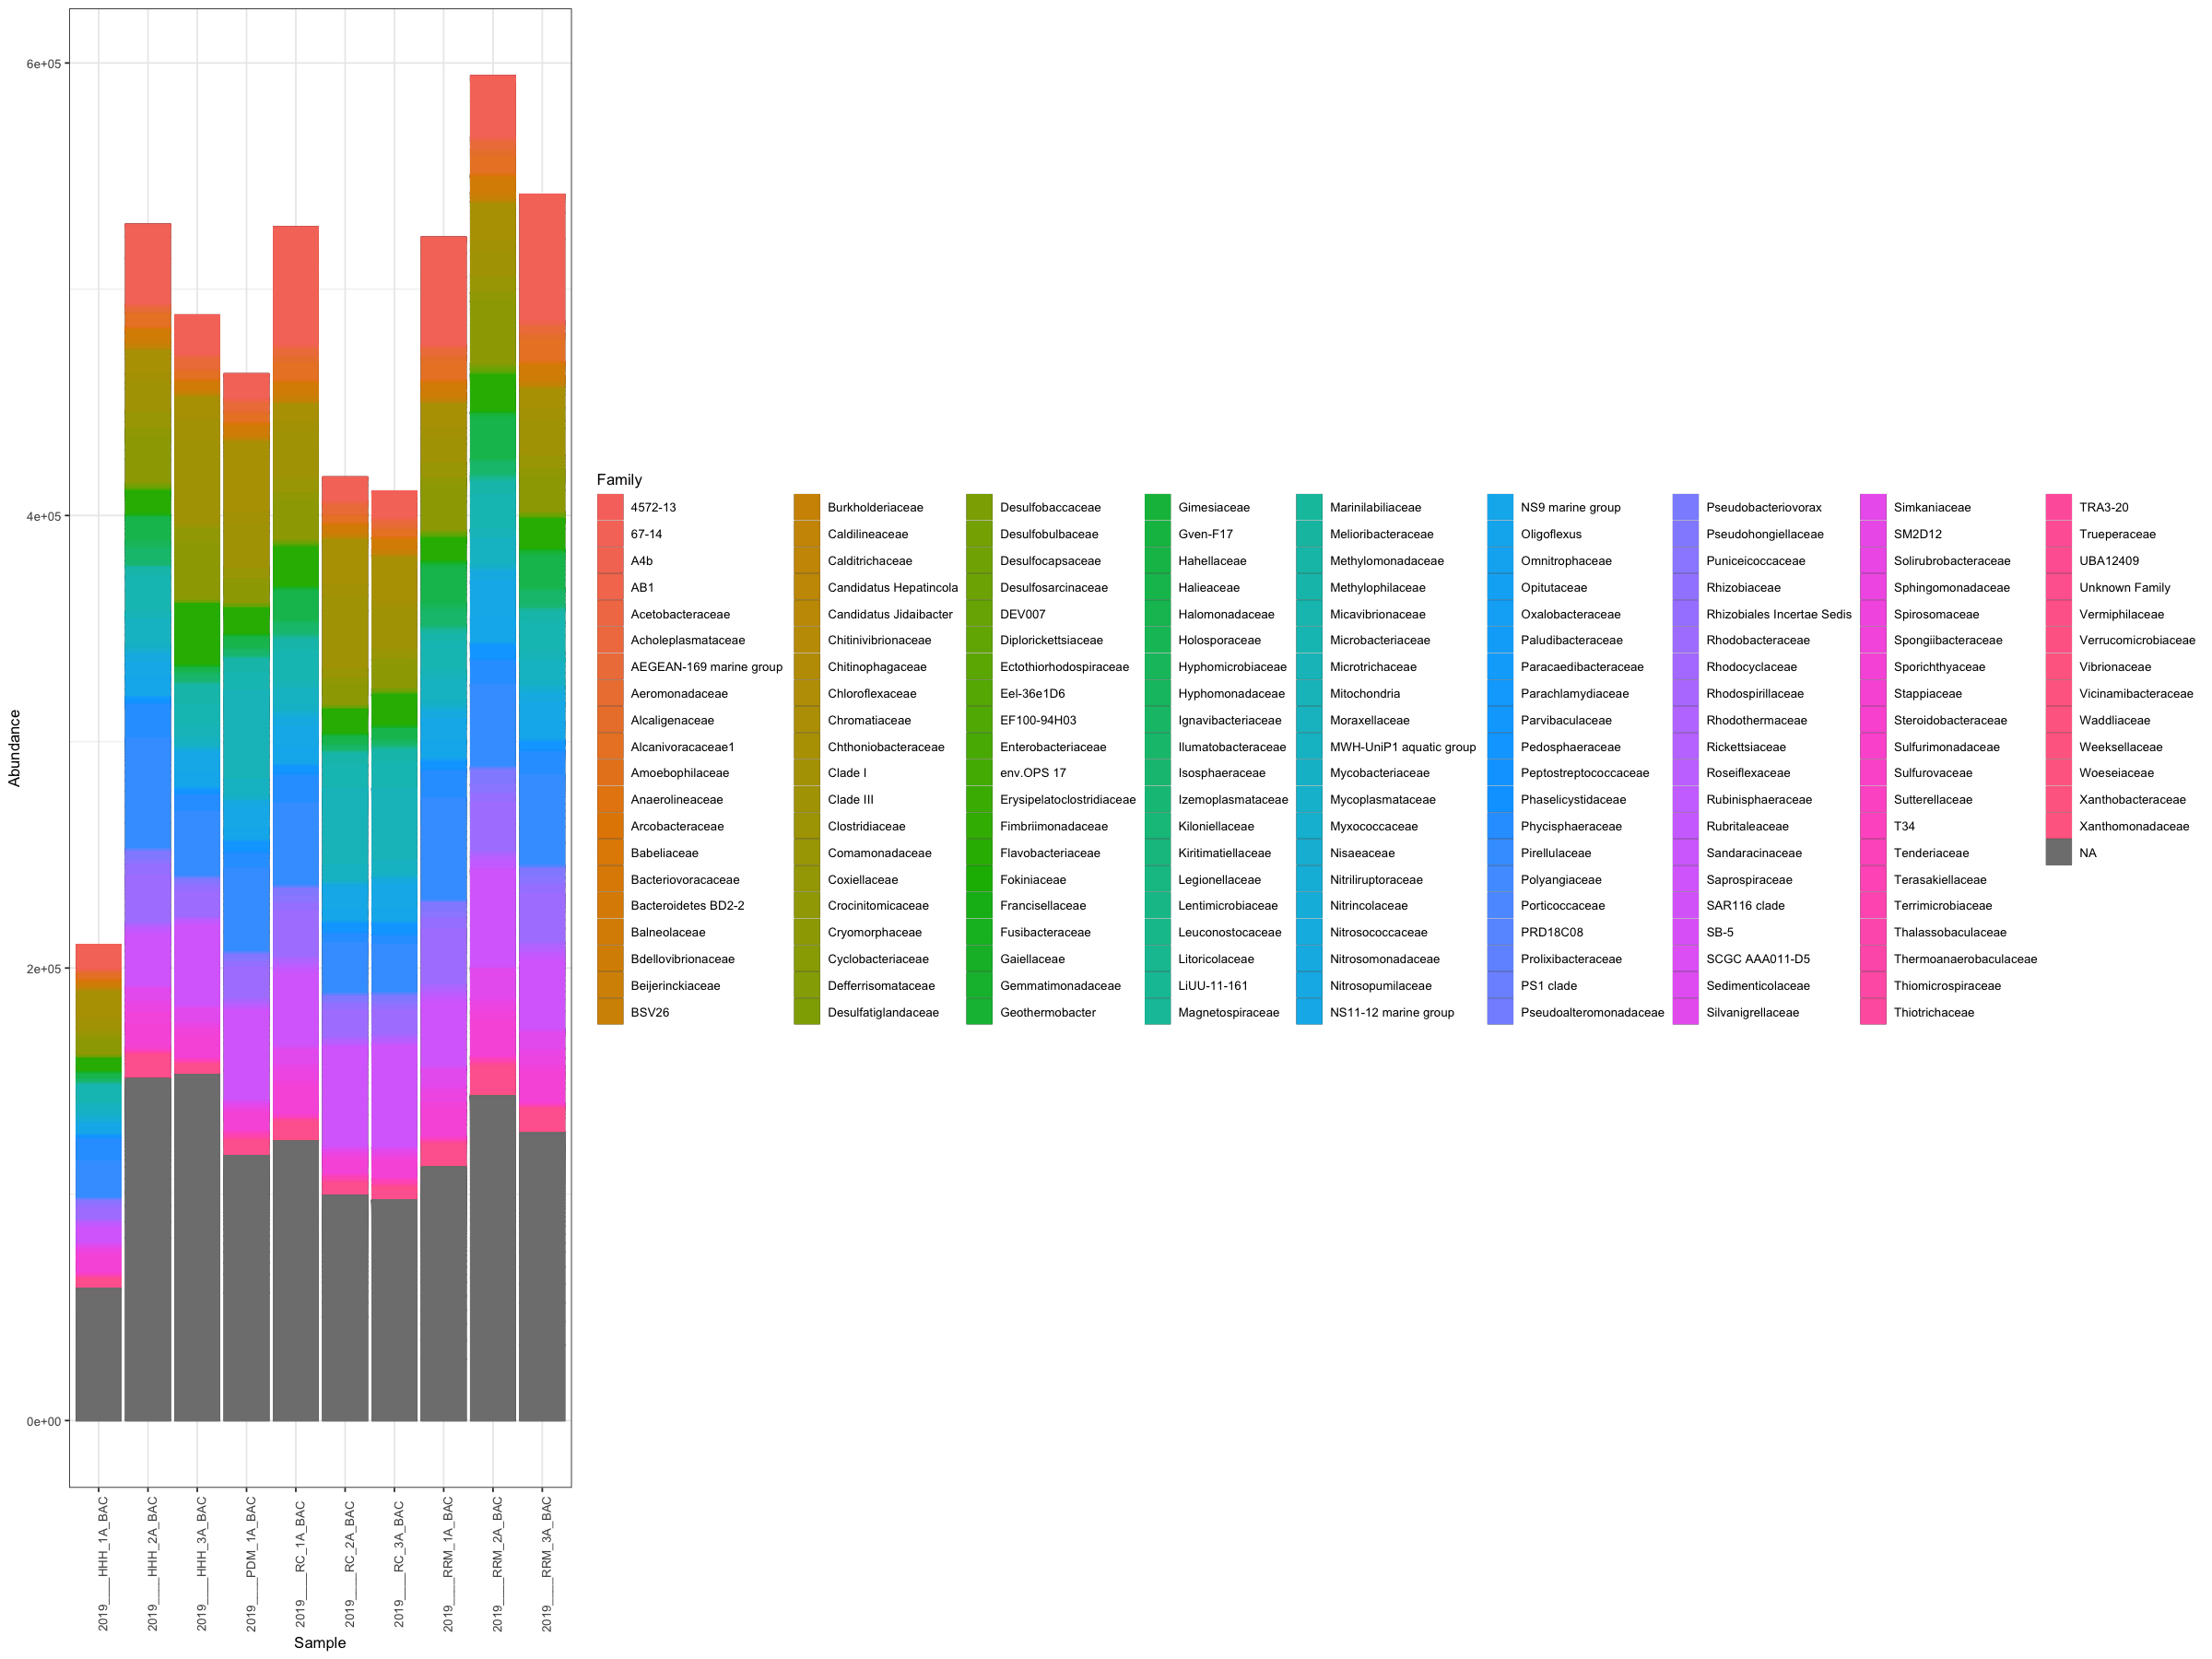

In [29]:
plot_bar(River_bacilli,  fill="Family") +
geom_bar(aes(color=Family, fill=Family), stat="identity", position="stack")+
theme_bw()+
theme(axis.text.x = element_text(angle = 90), text = element_text(size=10))

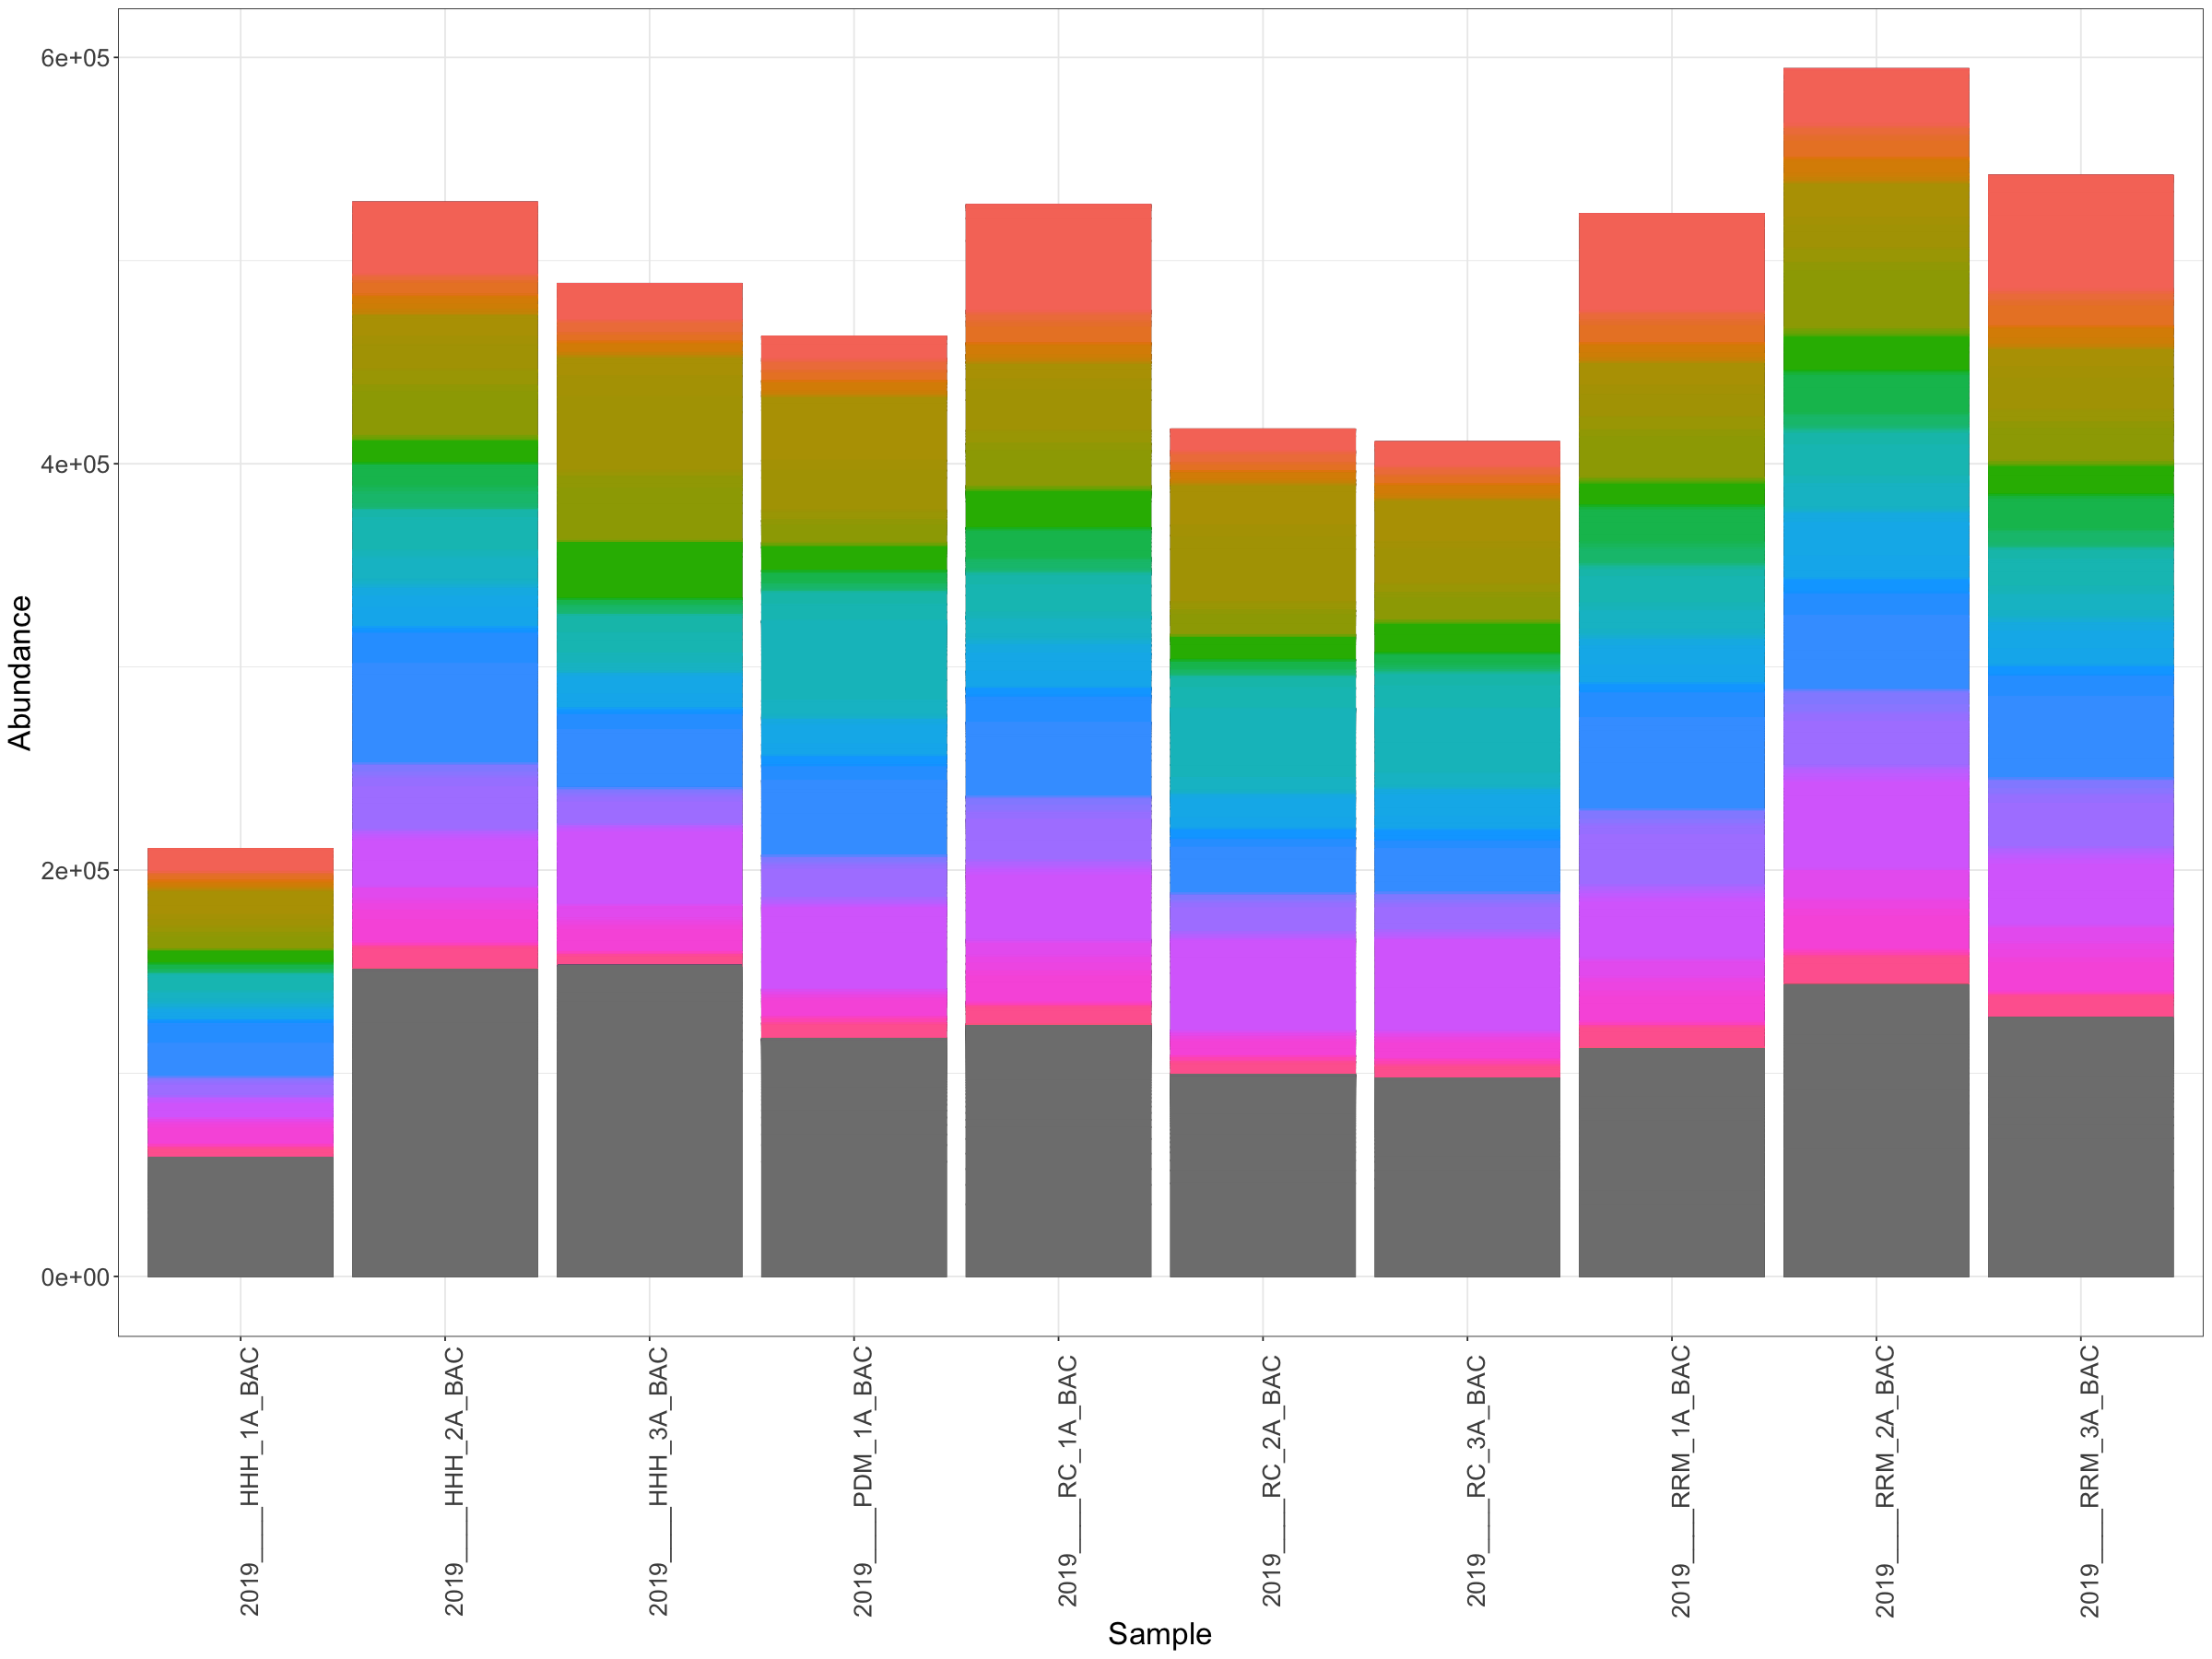

In [25]:
plot_bar(River_bacilli,  fill="Family") +
geom_bar(aes(color=Family, fill=Family), stat="identity", position="stack")+
theme_bw()+
theme(legend.position="none", axis.text.x = element_text(angle = 90), text = element_text(size=20))

In [226]:
River_pelagi = subset_taxa(River, Phylum="Alphaproteobacteria")
#plot_heatmap(River_pelagi, method=NULL, distance=NULL, "Treatment1_Density", "Family")

In [38]:
plot_bar(River_pelagi,  fill="Family") +
geom_bar(aes(color=Family, fill=Family), stat="identity", position="stack")+
theme_bw()+
theme(axis.text.x = element_text(angle = 90))


ERROR: Error in psmelt(physeq): object 'River_pelagi' not found


In [170]:
River_bac100 = prune_taxa(names(sort(taxa_sums(River_nocyano),TRUE)[1:100]), River_nocyano)

Warning message:
“Transformation introduced infinite values in discrete y-axis”


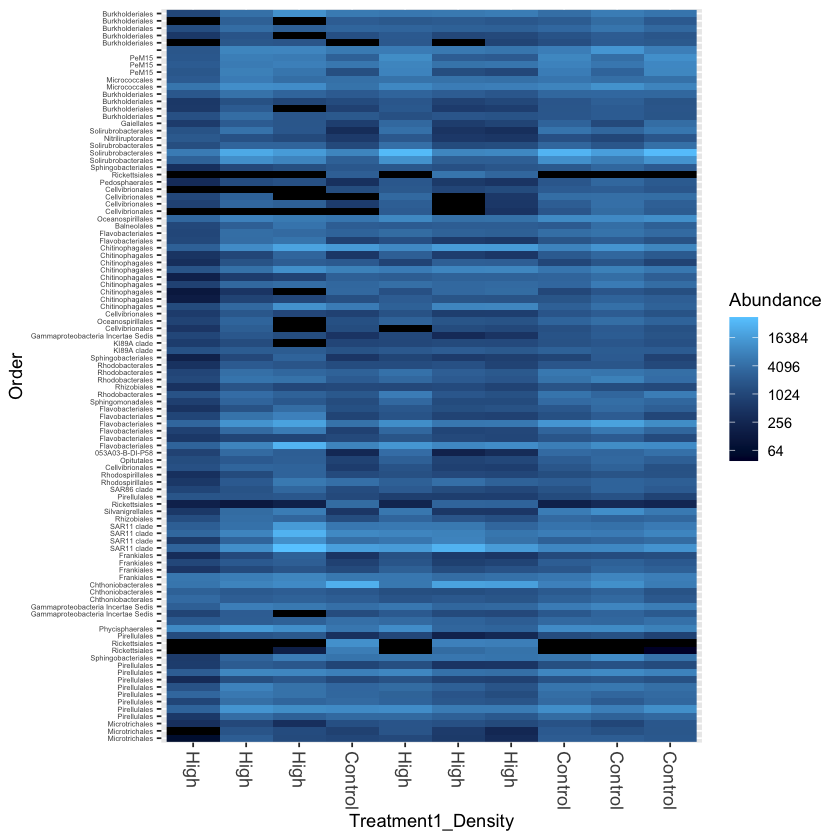

In [171]:
plot_heatmap(River_bac100, method=NULL, distance=NULL, "Treatment1_Density", "Order")

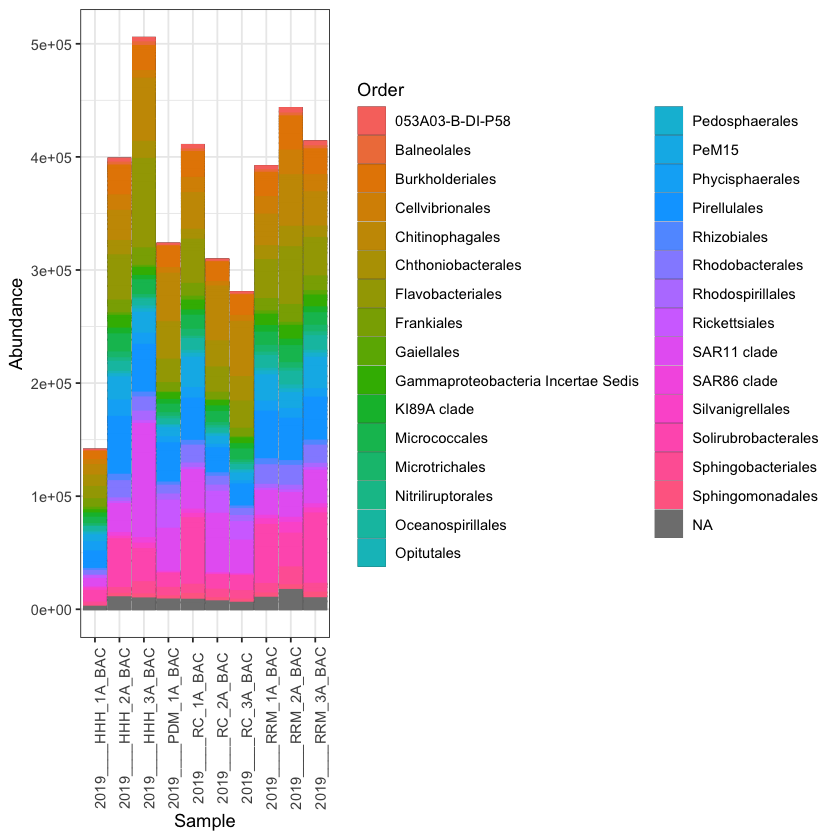

In [209]:
plot_bar(River_bac100,  fill="Order") +
geom_bar(aes(color=Order, fill=Order), stat="identity", position="stack")+
theme_bw()+
theme(axis.text.x = element_text(angle = 90))


Warning message:
“Transformation introduced infinite values in discrete y-axis”


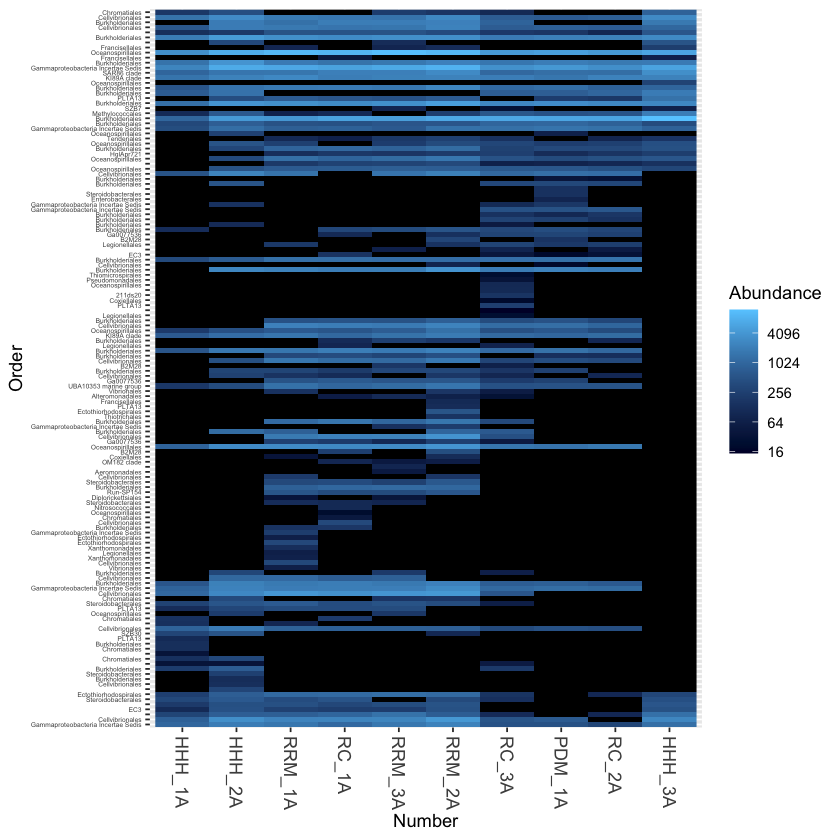

In [210]:
River_Gamma = subset_taxa(River, Class=="Gammaproteobacteria")
plot_heatmap(River_Gamma, "NMDS", "bray", "Number", "Order")

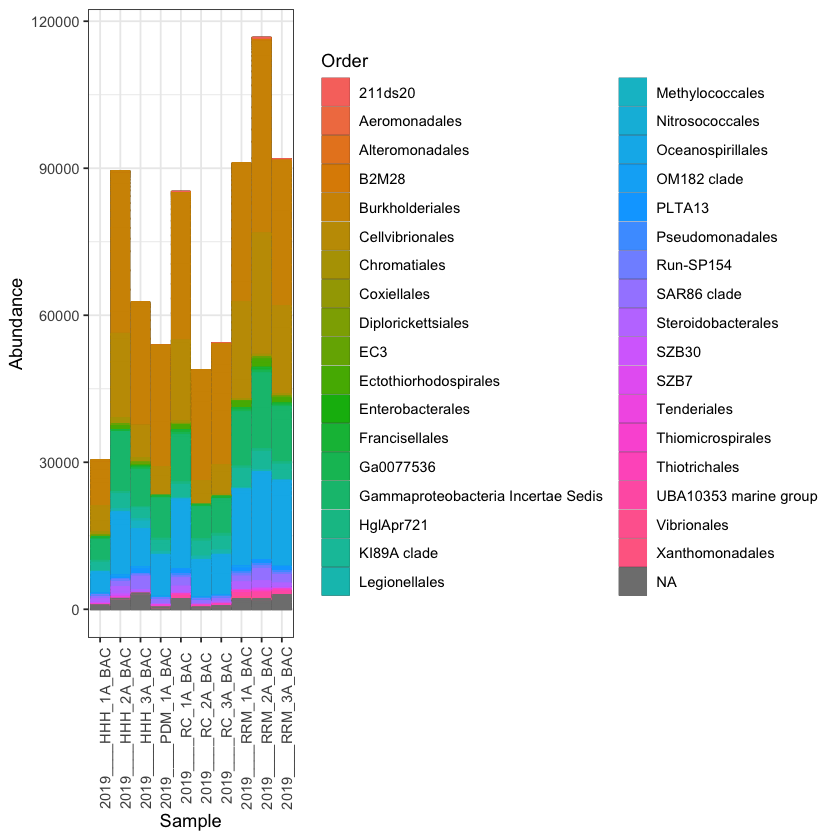

In [214]:
plot_bar(River_Gamma,  fill="Order") +
geom_bar(aes(color=Order, fill=Order), stat="identity", position="stack")+
theme_bw()+
theme(axis.text.x = element_text(angle = 90))


In [26]:
River_Entero = subset_taxa(River_bacilli, Order=="Enterobacterales")

In [27]:
River_Entero

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1 taxa and 10 samples ]
sample_data() Sample Data:       [ 10 samples by 17 sample variables ]
tax_table()   Taxonomy Table:    [ 1 taxa by 6 taxonomic ranks ]

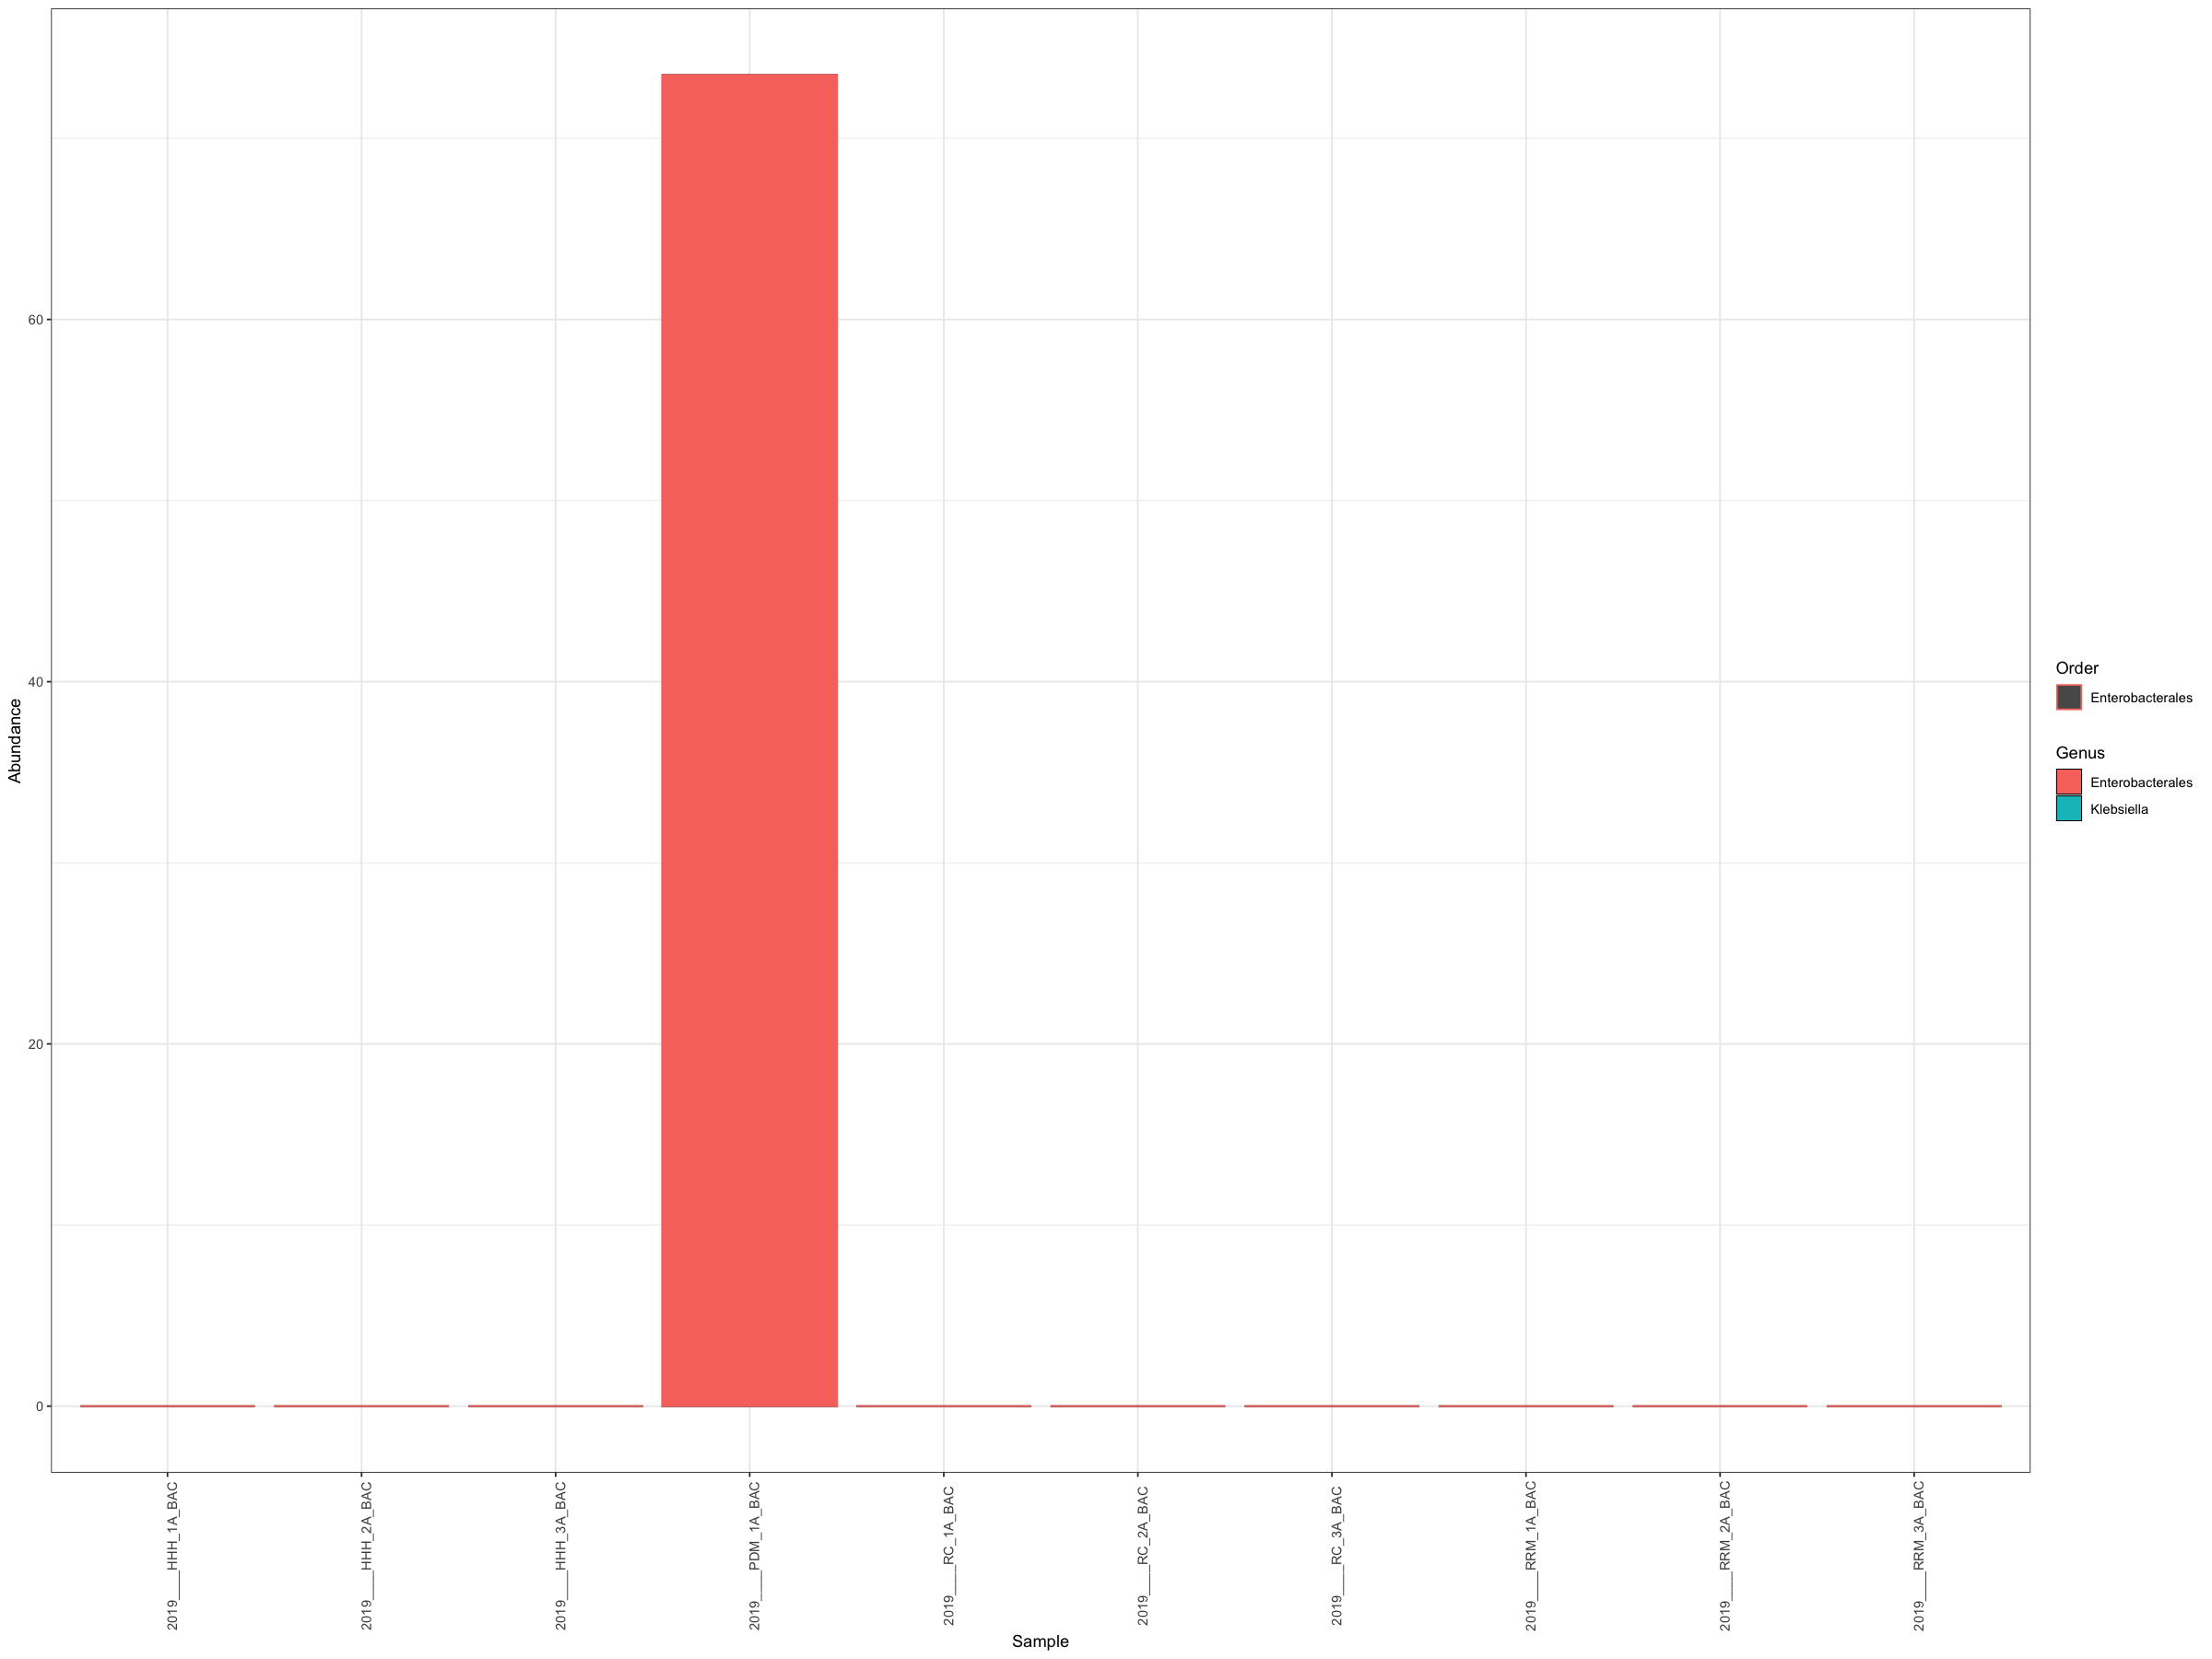

In [28]:
plot_bar(River_Entero,  fill="Genus") +
geom_bar(aes(color=Order, fill=Order), stat="identity", position="stack")+
theme_bw()+
theme(axis.text.x = element_text(angle = 90))


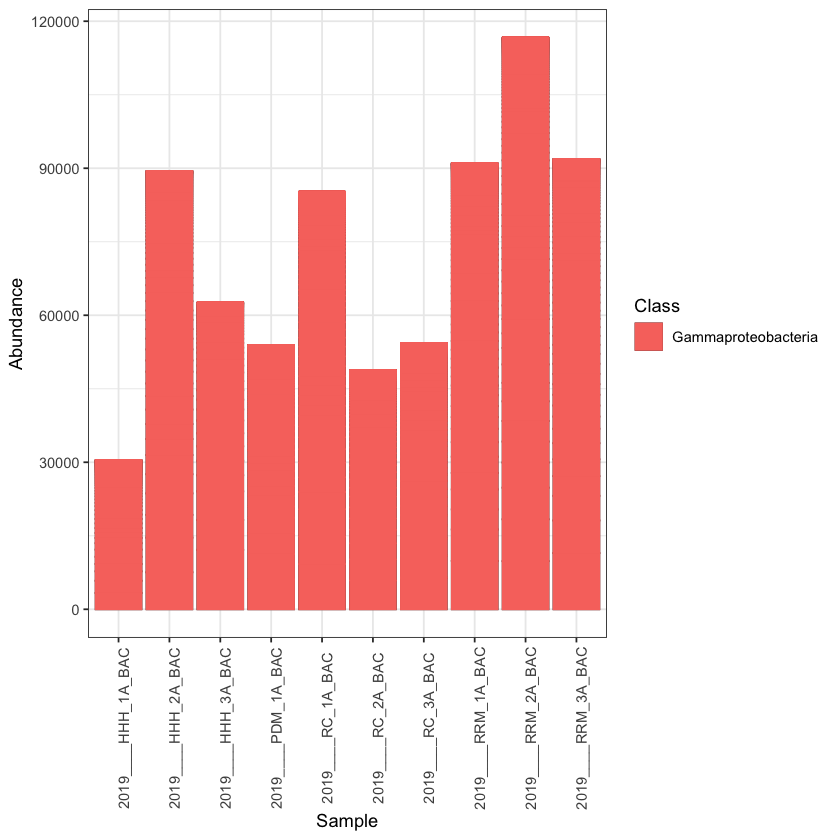

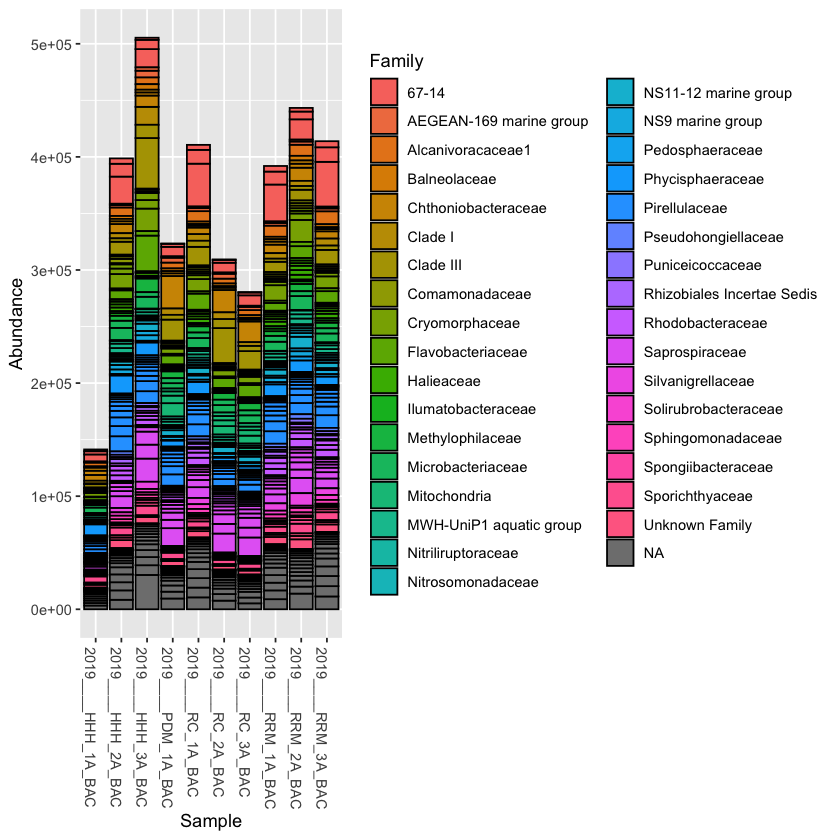

In [53]:
River

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1228 taxa and 10 samples ]
sample_data() Sample Data:       [ 10 samples by 17 sample variables ]
tax_table()   Taxonomy Table:    [ 1228 taxa by 6 taxonomic ranks ]

Square root transformation
Wisconsin double standardization
Run 0 stress 0.00300228 
Run 1 stress 0.0879503 
Run 2 stress 0.002503533 
... New best solution
... Procrustes: rmse 0.1048918  max resid 0.1799708 
Run 3 stress 0.003160617 
Run 4 stress 0.2106397 
Run 5 stress 0.08799388 
Run 6 stress 0.0007113791 
... New best solution
... Procrustes: rmse 0.04693749  max resid 0.1354366 
Run 7 stress 0.002566666 
Run 8 stress 0.00305072 
Run 9 stress 0.08795033 
Run 10 stress 0.002869026 
Run 11 stress 0.0003643608 
... New best solution
... Procrustes: rmse 0.0117378  max resid 0.02281721 
Run 12 stress 0.08799388 
Run 13 stress 0.0001264442 
... New best solution
... Procrustes: rmse 0.04695409  max resid 0.1063038 
Run 14 stress 0.0005549486 
... Procrustes: rmse 0.003959893  max resid 0.009733717 
... Similar to previous best
Run 15 stress 8.698533e-05 
... New best solution
... Procrustes: rmse 0.0655675  max resid 0.1333944 
Run 16 stress 0.228363 
Run 17 stress 0.003079562 
Run 18 

Warning message in metaMDS(veganifyOTU(physeq), distance, ...):
“stress is (nearly) zero: you may have insufficient data”


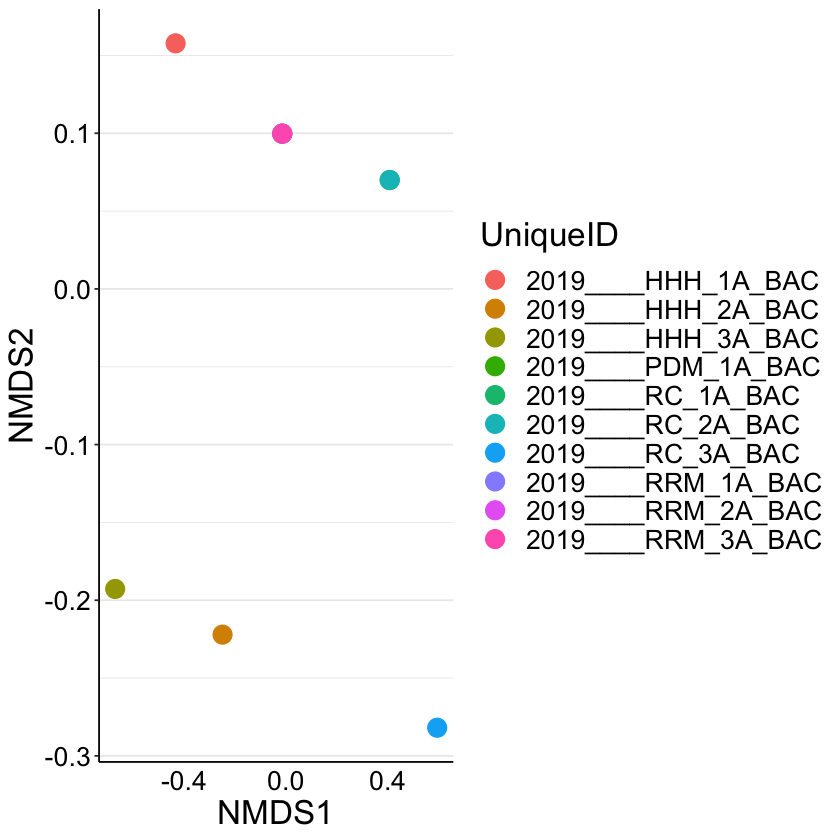